<a href="https://colab.research.google.com/github/abdelazizadel20/HumanResource/blob/main/HR_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Human Resources Dataset Analysis - Week 1
## Data Model Building, Data Cleaning and Preprocessing

---

### 📋 Project Overview
This notebook demonstrates the complete process of:
1. **Data Exploration** - Understanding the dataset structure
2. **Data Model Design** - Creating relationships between tables
3. **Data Cleaning** - Handling missing values, duplicates, and inconsistencies
4. **SQL Schema Creation** - Building a relational database
5. **Data Preprocessing** - Feature engineering and data transformation

---

# Import libraries

In [502]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

#classification
import sklearn as skl
# Settings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# --- MODIFICATION: Updated plot style (seaborn-v0_8-darkgrid is deprecated) ---
plt.style.use('seaborn-v0_8-darkgrid') # This might throw a warning, 'seaborn-darkgrid' is safer
sns.set_palette('husl')

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


# Load Data

In [503]:
print("\n🔄 [Step 1] Loading all 5 datasets...")
print("="*80)

try:

    employee_df = pd.read_csv('Employee.csv')
    education_df = pd.read_csv('EducationLevel.csv')
    performance_df = pd.read_csv('PerformanceRating.csv')
    rating_df = pd.read_csv('RatingLevel.csv')
    satisfied_df = pd.read_csv('SatisfiedLevel.csv')

    print('📊 Original Dataset Shapes:')
    print(f'  Employee: {employee_df.shape}')
    print(f'  PerformanceRating: {performance_df.shape}')
    print(f'  EducationLevel: {education_df.shape}')
    print(f'  RatingLevel: {rating_df.shape}')
    print(f'  SatisfiedLevel: {satisfied_df.shape}')

except FileNotFoundError as e:

    print(f"❌ ERROR: Could not find file {e.filename}. Please make sure all CSV files are in the same directory.")


🔄 [Step 1] Loading all 5 datasets...
📊 Original Dataset Shapes:
  Employee: (1470, 23)
  PerformanceRating: (6709, 11)
  EducationLevel: (5, 2)
  RatingLevel: (5, 2)
  SatisfiedLevel: (5, 2)


In [504]:
print("Checking for 'Orphan' Performance Records (Employees in Performance but not in Employee):")
orphan_ids = performance_df[~performance_df['EmployeeID'].isin(employee_df['EmployeeID'])]['EmployeeID'].unique()

if len(orphan_ids) > 0:
    print(f"  ❌ Found {len(orphan_ids)} orphan EmployeeIDs in PerformanceRating.")
    # print(orphan_ids.tolist()) # Uncomment this line if you want to see the full list
else:
    print("  ✅ Good: No orphan records found. All performance reviews map to an existing employee.")

Checking for 'Orphan' Performance Records (Employees in Performance but not in Employee):
  ✅ Good: No orphan records found. All performance reviews map to an existing employee.


# Data Exploration

### Employee Dataset

In [505]:
print('👥 Employee Dataset Overview')
print('='*80)
employee_df.info()
print('\n')

👥 Employee Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary      

In [506]:
print("\n📋 Employee Data Sample (Head):")
employee_df.head()


📋 Employee Data Sample (Head):


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [507]:
print("\n📈 Employee Statistical Summary (Describe):")
employee_df.describe()


📈 Employee Statistical Summary (Describe):


,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


# Performance Rating Dataset

In [508]:
print('📊 Performance Rating Dataset Overview')
print('='*80)
performance_df.info()

📊 Performance Rating Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [509]:
print("\n📋 Performance Rating Data Sample (Head):")
performance_df.head()


📋 Performance Rating Data Sample (Head):


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


# Lookup Tables

In [510]:
print('📚 Education Levels:')
display(education_df)

print('\n⭐ Rating Levels:')
display(rating_df)

print('\n😊 Satisfaction Levels:')
display(satisfied_df)

📚 Education Levels:


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate



⭐ Rating Levels:


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond



😊 Satisfaction Levels:


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


# Data Model Design
### Understanding Relationships

In [511]:
print('Data Model Relationships (Validation)')
print('='*80)

# 1. Employee to EducationLevel
print('\n1️⃣ Employee → EducationLevel (Many-to-One)')
print(f'   Education values in Employee: {sorted(employee_df["Education"].unique())}')
print(f'   EducationLevelID in EducationLevel: {sorted(education_df["EducationLevelID"].unique())}')

# 2. Employee to PerformanceRating
print('\n2️⃣ Employee → PerformanceRating (One-to-Many)')
print(f'   Unique employees in Employee: {employee_df["EmployeeID"].nunique()} (e.g., 1470)')
print(f'   Unique employees in PerformanceRating: {performance_df["EmployeeID"].nunique()} (e.g., 1470)')
perf_counts = performance_df.groupby('EmployeeID').size()
print(f'   Average ratings per employee: {perf_counts.mean():.2f} <-- THIS IS THE KEY')
print(f'   Min ratings: {perf_counts.min()}, Max ratings: {perf_counts.max()} (Confirms 1-to-Many)')

# 3. PerformanceRating to RatingLevel
print('\n3️⃣ PerformanceRating → RatingLevel (Many-to-One)')
print(f'   SelfRating values: {sorted(performance_df["SelfRating"].unique())}')
print(f'   ManagerRating values: {sorted(performance_df["ManagerRating"].unique())}')
print(f'   RatingID in RatingLevel: {sorted(rating_df["RatingID"].unique())}')

# 4. PerformanceRating to SatisfiedLevel
print('\n4️⃣ PerformanceRating → SatisfiedLevel (Many-to-One)')
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction',
                     'RelationshipSatisfaction', 'WorkLifeBalance']
for col in satisfaction_cols:
    print(f'   {col}: {sorted(performance_df[col].unique())}')

Data Model Relationships (Validation)

1️⃣ Employee → EducationLevel (Many-to-One)
   Education values in Employee: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   EducationLevelID in EducationLevel: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

2️⃣ Employee → PerformanceRating (One-to-Many)
   Unique employees in Employee: 1470 (e.g., 1470)
   Unique employees in PerformanceRating: 1280 (e.g., 1470)
   Average ratings per employee: 5.24 <-- THIS IS THE KEY
   Min ratings: 1, Max ratings: 10 (Confirms 1-to-Many)

3️⃣ PerformanceRating → RatingLevel (Many-to-One)
   SelfRating values: [np.int64(3), np.int64(4), np.int64(5)]
   ManagerRating values: [np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   RatingID in RatingLevel: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

4️⃣ PerformanceRating → SatisfiedLevel (Many-to-One)
   EnvironmentSatisfaction: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
   JobS

### 4.2 Entity Relationship Diagram (ERD)

```
┌─────────────────────┐
│   Employee (1470)   │  ← Main Table ┌──────────────────┐   (N:1)  
│                     │               |  EducationLevel  │
|  - EmployeeID (PK)  |───────────────│   (5 rows)       │
|                     |               └──────────────────┘
│  - Education (FK)   │
└──────────┬──────────┘
           │
           │ 1:N (One-to-Many)
           │
           ▼
┌─────────────────────┐
│ PerformanceRating   │
│    (6709 records)   │
│  - PerformanceID(PK)│
│  - EmployeeID (FK)  │
│  - SelfRating (FK)  │
│  - ManagerRating(FK)│
│  - *Satisfaction(FK)│
└──────────┬──────────┘
           │
           ├──────────────────┬──────────────────┬
           │                  │                  │                  
           ▼                  ▼                  ▼                  
  ┌──────────────┐  ┌──────────────┐  ┌──────────────┐
  │ RatingLevel  │  │SatisfiedLevel│  │SatisfiedLevel│
  │  (5 rows)    │  │  (5 rows)    │  │  (5 rows)    │
  └──────────────┘  └──────────────┘  └──────────────┘
```

# Data Cleaning
### check for missing values

In [512]:
print('🔍 Missing Values Check (Pre-Merge)')
print('='*80)

datasets = {
    'Employee': employee_df,
    'EducationLevel': education_df,
    'PerformanceRating': performance_df,
    'RatingLevel': rating_df,
    'SatisfiedLevel': satisfied_df
}

for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f'\n❌ {name} - Missing values found:')
        print(missing[missing > 0])
    else:
        print(f'✅ {name} - No missing values')

print("\n(Note: This check is *before* merging. We will check again *after* merging.)")

🔍 Missing Values Check (Pre-Merge)
✅ Employee - No missing values
✅ EducationLevel - No missing values
✅ PerformanceRating - No missing values
✅ RatingLevel - No missing values
✅ SatisfiedLevel - No missing values

(Note: This check is *before* merging. We will check again *after* merging.)


## Check for Duplicates

In [513]:
print('🔍 Duplicates Check (Checking Primary Keys)')
print('='*80)

# Check Employee duplicates
emp_duplicates = employee_df['EmployeeID'].duplicated().sum()
print(f'Employee (EmployeeID) duplicates: {emp_duplicates}')

# Check Performance duplicates
perf_duplicates = performance_df['PerformanceID'].duplicated().sum()
print(f'PerformanceRating (PerformanceID) duplicates: {perf_duplicates}')

if emp_duplicates == 0 and perf_duplicates == 0:
    print('\n✅ No duplicate Primary Keys found!')
else:
    print('\n❌ WARNING: Duplicate Primary Keys found. These must be handled.')

🔍 Duplicates Check (Checking Primary Keys)
Employee (EmployeeID) duplicates: 0
PerformanceRating (PerformanceID) duplicates: 0

✅ No duplicate Primary Keys found!


### Data Type Conversion

In [514]:
print("\n🔄 [Step 2] Preparing data for merging (Part 1: Date Conversion)...")
print("="*80)

# Convert HireDate
print(f'HireDate before: {employee_df["HireDate"].dtype}')
employee_df['HireDate'] = pd.to_datetime(employee_df['HireDate'])
print(f'HireDate after: {employee_df["HireDate"].dtype}')

# Convert ReviewDate
print(f'\nReviewDate before: {performance_df["ReviewDate"].dtype}')
performance_df['ReviewDate'] = pd.to_datetime(performance_df['ReviewDate'])
print(f'ReviewDate after: {performance_df["ReviewDate"].dtype}')

print('\n✅ Date conversion completed!')


🔄 [Step 2] Preparing data for merging (Part 1: Date Conversion)...
HireDate before: object
HireDate after: datetime64[ns]

ReviewDate before: object
ReviewDate after: datetime64[ns]

✅ Date conversion completed!


## Data Validation

In [515]:
print('✔️ Data Validation (Numerical Ranges)')
print('='*80)

# Age validation
print('\n👤 Age:')
age_min = employee_df["Age"].min()
print(f'   Min: {age_min}, Max: {employee_df["Age"].max()}, Mean: {employee_df["Age"].mean():.1f}')

# Salary validation
print('\n💰 Salary:')
salary_min = employee_df["Salary"].min()
print(f'   Min: ${salary_min:,}, Max: ${employee_df["Salary"].max():,}, Mean: ${employee_df["Salary"].mean():,.0f}')

# Distance validation
print('\n🏠 Distance from Home:')
print(f'   Min: {employee_df["DistanceFromHome (KM)"].min()} km, Max: {employee_df["DistanceFromHome (KM)"].max()} km, Mean: {employee_df["DistanceFromHome (KM)"].mean():.1f} km')

if age_min < 18 or salary_min <= 0:
     print('\n❌ WARNING: Illogical data found (e.g., Age < 18 or Salary <= 0).')
else:
    print('\n✅ All values appear to be within logical ranges!')

✔️ Data Validation (Numerical Ranges)

👤 Age:
   Min: 18, Max: 51, Mean: 29.0

💰 Salary:
   Min: $20,387, Max: $547,204, Mean: $112,956

🏠 Distance from Home:
   Min: 1 km, Max: 45 km, Mean: 22.5 km

✅ All values appear to be within logical ranges!


# solving the one to many perfomances issue

In [516]:
print("\n Preparing data (Part 2: Get Latest Performance Review)")
print("="*80)

snapshot_date = performance_df['ReviewDate'].max()
print(f"  Snapshot date defined as: {snapshot_date.date()} (Latest ReviewDate)")

# We only want the most recent review for each employee.
print("  Filtering for latest performance review per employee...")
performance_df.sort_values(by=['EmployeeID', 'ReviewDate'], ascending=[True, False], inplace=True)
latest_performance_df = performance_df.drop_duplicates(subset='EmployeeID', keep='first')
print(f"  Performance data shape changed from {performance_df.shape} to {latest_performance_df.shape} (now 1-to-1)")


 Preparing data (Part 2: Get Latest Performance Review)
  Snapshot date defined as: 2022-12-31 (Latest ReviewDate)
  Filtering for latest performance review per employee...
  Performance data shape changed from (6709, 11) to (1280, 11) (now 1-to-1)


### Merging

In [517]:
print("\n🔄 [Step 3] Merging all datasets into one...")
print("="*80)

print("  Merging Employee (left) with Latest_Performance...")
final_df = pd.merge(
    employee_df,
    latest_performance_df,
    on='EmployeeID',
    how='left'
)
print(f"  Shape after merge 1: {final_df.shape}")

print("  Mapping lookup tables (Education, Rating, Satisfaction)...")

# 1. Create mapping Series (dictionaries on steroids)

education_map = education_df.set_index('EducationLevelID')['EducationLevel']

rating_map = rating_df.set_index('RatingID')['RatingLevel']

satisfied_map = satisfied_df.set_index('SatisfactionID')['SatisfactionLevel']
#removing the extra space

# 2. Apply the maps to the final_df
final_df['EducationLabel'] = final_df['Education'].map(education_map)


if 'JobSatisfaction' in final_df.columns:
    final_df['JobSatisfactionLabel'] = final_df['JobSatisfaction'].map(satisfied_map)
if 'EnvironmentSatisfaction' in final_df.columns:
    final_df['EnvironmentSatisfactionLabel'] = final_df['EnvironmentSatisfaction'].map(satisfied_map)
if 'RelationshipSatisfaction' in final_df.columns:
    final_df['RelationshipSatisfactionLabel'] = final_df['RelationshipSatisfaction'].map(satisfied_map)
if 'WorkLifeBalance' in final_df.columns:
    final_df['WorkLifeBalanceLabel'] = final_df['WorkLifeBalance'].map(satisfied_map)

if 'ManagerRating' in final_df.columns:
    final_df['ManagerRatingLabel'] = final_df['ManagerRating'].map(rating_map)
if 'SelfRating' in final_df.columns:
    final_df['SelfRatingLabel'] = final_df['SelfRating'].map(rating_map)


print("  ✅ All lookups mapped successfully.")
display(final_df.head())


🔄 [Step 3] Merging all datasets into one...
  Merging Employee (left) with Latest_Performance...
  Shape after merge 1: (1470, 33)
  Mapping lookup tables (Education, Rating, Satisfaction)...
  ✅ All lookups mapped successfully.


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLabel,JobSatisfactionLabel,EnvironmentSatisfactionLabel,RelationshipSatisfactionLabel,WorkLifeBalanceLabel,ManagerRatingLabel,SelfRatingLabel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR6529,2022-10-29,4.0,2.0,4.0,1.0,0.0,2.0,5.0,4.0,Doctorate,Dissatisfied,Satisfied,Satisfied,Dissatisfied,Exceeds Expectation,Above and Beyond
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,2012-01-04,No,10,6,10,0,PR6295,2022-07-29,3.0,4.0,4.0,3.0,0.0,2.0,5.0,4.0,Masters,Satisfied,Neutral,Satisfied,Dissatisfied,Exceeds Expectation,Above and Beyond
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,2012-01-04,No,10,6,10,8,PR5918,2022-04-07,4.0,5.0,3.0,3.0,0.0,4.0,4.0,3.0,Masters,Very Satisfied,Satisfied,Neutral,Satisfied,Meets Expectation,Exceeds Expectation
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,2012-01-05,No,10,10,10,0,PR5879,2022-03-26,1.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,Bachelors,Satisfied,Very Dissatisfied,Neutral,Neutral,Meets Expectation,Meets Expectation
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,2012-01-05,Yes,6,1,1,6,PR4958,2021-05-12,3.0,4.0,3.0,1.0,2.0,5.0,3.0,2.0,High School,Satisfied,Neutral,Neutral,Very Satisfied,Needs Improvement,Meets Expectation


### Removing Any Extra Space

In [518]:
print("\n🔄 [Step 3.5] Post-Merge Label Cleaning...")
print("="*80)

# --- THIS IS THE FIX for the 'Satisfied ' bug ---
print("   Cleaning trailing spaces from Satisfaction labels...")
final_df['JobSatisfactionLabel'] = final_df['JobSatisfactionLabel'].str.strip()

# (Let's clean the others too, just in case)
print("   Cleaning other mapped labels (just in case)...")
final_df['EnvironmentSatisfactionLabel'] = final_df['EnvironmentSatisfactionLabel'].str.strip()
final_df['RelationshipSatisfactionLabel'] = final_df['RelationshipSatisfactionLabel'].str.strip()
final_df['WorkLifeBalanceLabel'] = final_df['WorkLifeBalanceLabel'].str.strip()
final_df['ManagerRatingLabel'] = final_df['ManagerRatingLabel'].str.strip()
final_df['SelfRatingLabel'] = final_df['SelfRatingLabel'].str.strip()

print("   ✅ All labels are now clean.")


🔄 [Step 3.5] Post-Merge Label Cleaning...
   Cleaning trailing spaces from Satisfaction labels...
   Cleaning other mapped labels (just in case)...
   ✅ All labels are now clean.


In [519]:
print("   Cleaning *all* label columns in final_df...")

# List of all columns we created from lookup tables
label_cols = [
    'EducationLabel', 'JobSatisfactionLabel', 'EnvironmentSatisfactionLabel',
    'RelationshipSatisfactionLabel', 'WorkLifeBalanceLabel',
    'ManagerRatingLabel', 'SelfRatingLabel'
]

for col in label_cols:
    if col in final_df.columns:

        final_df[col] = final_df[col].astype(str).str.strip().replace('nan', pd.NA)

print("   ✅ final_df is now permanently clean.")
print("\n[Verification] Cleaned JobSatisfactionLabel categories:")
print(final_df['JobSatisfactionLabel'].unique())
print("\n[Verification] Cleaned ManagerRatingLabel categories:")
print(final_df['ManagerRatingLabel'].unique())

   Cleaning *all* label columns in final_df...
   ✅ final_df is now permanently clean.

[Verification] Cleaned JobSatisfactionLabel categories:
['Dissatisfied' 'Satisfied' 'Very Satisfied' 'Neutral' 'Very Dissatisfied'
 <NA>]

[Verification] Cleaned ManagerRatingLabel categories:
['Exceeds Expectation' 'Meets Expectation' 'Needs Improvement'
 'Above and Beyond' <NA>]


##  Feature Engineering

### Create Additional Features

In [520]:
print("\n Feature Engineering (on the final merged dataset)...")
print("="*80)

print(f"  Calculating DaysAtCompany based on snapshot date {snapshot_date.date()}...")
final_df['DaysAtCompany'] = (snapshot_date - final_df['HireDate']).dt.days
print('✅ Added: DaysAtCompany')

print("  Creating AgeGroup...")
final_df['AgeGroup'] = pd.cut(final_df['Age'],
                              bins=[0, 25, 35, 45, 100],
                              labels=['18-25', '26-35', '36-45', '46+'])
print('✅ Added: AgeGroup')

print("  Creating SalaryRange...")
final_df['SalaryRange'] = pd.cut(final_df['Salary'],
                                 bins=[0, 50000, 75000, 100000, float('inf')],
                                 labels=['Low', 'Medium', 'High', 'Very High'])
print('\n✅ Added: SalaryRange')

print("  ✅ Feature engineering completed.")
display(final_df[['EmployeeID', 'Age', 'AgeGroup', 'Salary', 'SalaryRange', 'HireDate', 'DaysAtCompany']].head())


 Feature Engineering (on the final merged dataset)...
  Calculating DaysAtCompany based on snapshot date 2022-12-31...
✅ Added: DaysAtCompany
  Creating AgeGroup...
✅ Added: AgeGroup
  Creating SalaryRange...

✅ Added: SalaryRange
  ✅ Feature engineering completed.


,EmployeeID,Age,AgeGroup,Salary,SalaryRange,HireDate,DaysAtCompany
0,3012-1A41,30,26-35,102059,Very High,2012-01-03,4015
1,CBCB-9C9D,38,36-45,157718,Very High,2012-01-04,4014
2,95D7-1CE9,43,36-45,309964,Very High,2012-01-04,4014
3,47A0-559B,39,36-45,293132,Very High,2012-01-05,4013
4,42CC-040A,29,26-35,49606,Low,2012-01-05,4013


# View Enhanced Dataset

In [521]:
# Display sample with new features
final_df[['EmployeeID', 'FirstName', 'LastName', 'Age', 'AgeGroup',
          'Salary', 'SalaryRange', 'HireDate', 'DaysAtCompany']].head(10)

,EmployeeID,FirstName,LastName,Age,AgeGroup,Salary,SalaryRange,HireDate,DaysAtCompany
0,3012-1A41,Leonelle,Simco,30,26-35,102059,Very High,2012-01-03,4015
1,CBCB-9C9D,Leonerd,Aland,38,36-45,157718,Very High,2012-01-04,4014
2,95D7-1CE9,Ahmed,Sykes,43,36-45,309964,Very High,2012-01-04,4014
3,47A0-559B,Ermentrude,Berrie,39,36-45,293132,Very High,2012-01-05,4013
4,42CC-040A,Stace,Savege,29,26-35,49606,Low,2012-01-05,4013
5,C219-6C2E,Clerkclaude,Hinkins,34,26-35,133468,Very High,2012-01-05,4013
6,D906-B674,Uta,Melmar,42,36-45,259284,Very High,2012-01-09,4009
7,3C7D-86ED,Joyan,Brason,40,36-45,104426,Very High,2012-01-11,4007
8,3D71-8DC2,Alix,Blazejewski,38,36-45,147098,Very High,2012-01-11,4007
9,5476-CA0D,Kayley,Snoad,31,26-35,69747,Medium,2012-01-12,4006


# Saving Data

In [522]:
missing_vals = final_df.isnull().sum()
print("\n Missing Values Check (Post-Merge):")
missing_performance_cols = missing_vals[missing_vals > 0]
print(missing_performance_cols)
print(f"Found {missing_performance_cols.sum()} missing values. This is for employees hired after the last review date or those with no reviews.)")

print("\n Saving the single, unified dataset...")
final_df.to_csv('final_analytical_dataset.csv', index=False)

print("\n" + "="*80)
print("✅ PHASE 1 COMPLETED!")
print("  Saved: 'final_analytical_dataset.csv'")
print(f"  Final Shape: {final_df.shape}")
print("="*80)


 Missing Values Check (Post-Merge):
PerformanceID                      190
ReviewDate                         190
EnvironmentSatisfaction            190
JobSatisfaction                    190
RelationshipSatisfaction           190
TrainingOpportunitiesWithinYear    190
TrainingOpportunitiesTaken         190
WorkLifeBalance                    190
SelfRating                         190
ManagerRating                      190
JobSatisfactionLabel               190
EnvironmentSatisfactionLabel       190
RelationshipSatisfactionLabel      190
WorkLifeBalanceLabel               190
ManagerRatingLabel                 190
SelfRatingLabel                    190
dtype: int64
Found 3040 missing values. This is for employees hired after the last review date or those with no reviews.)

 Saving the single, unified dataset...

✅ PHASE 1 COMPLETED!
  Saved: 'final_analytical_dataset.csv'
  Final Shape: (1470, 43)


# EDA
## Demographics

📈 Generating Workforce Composition Plots (Descriptive)...


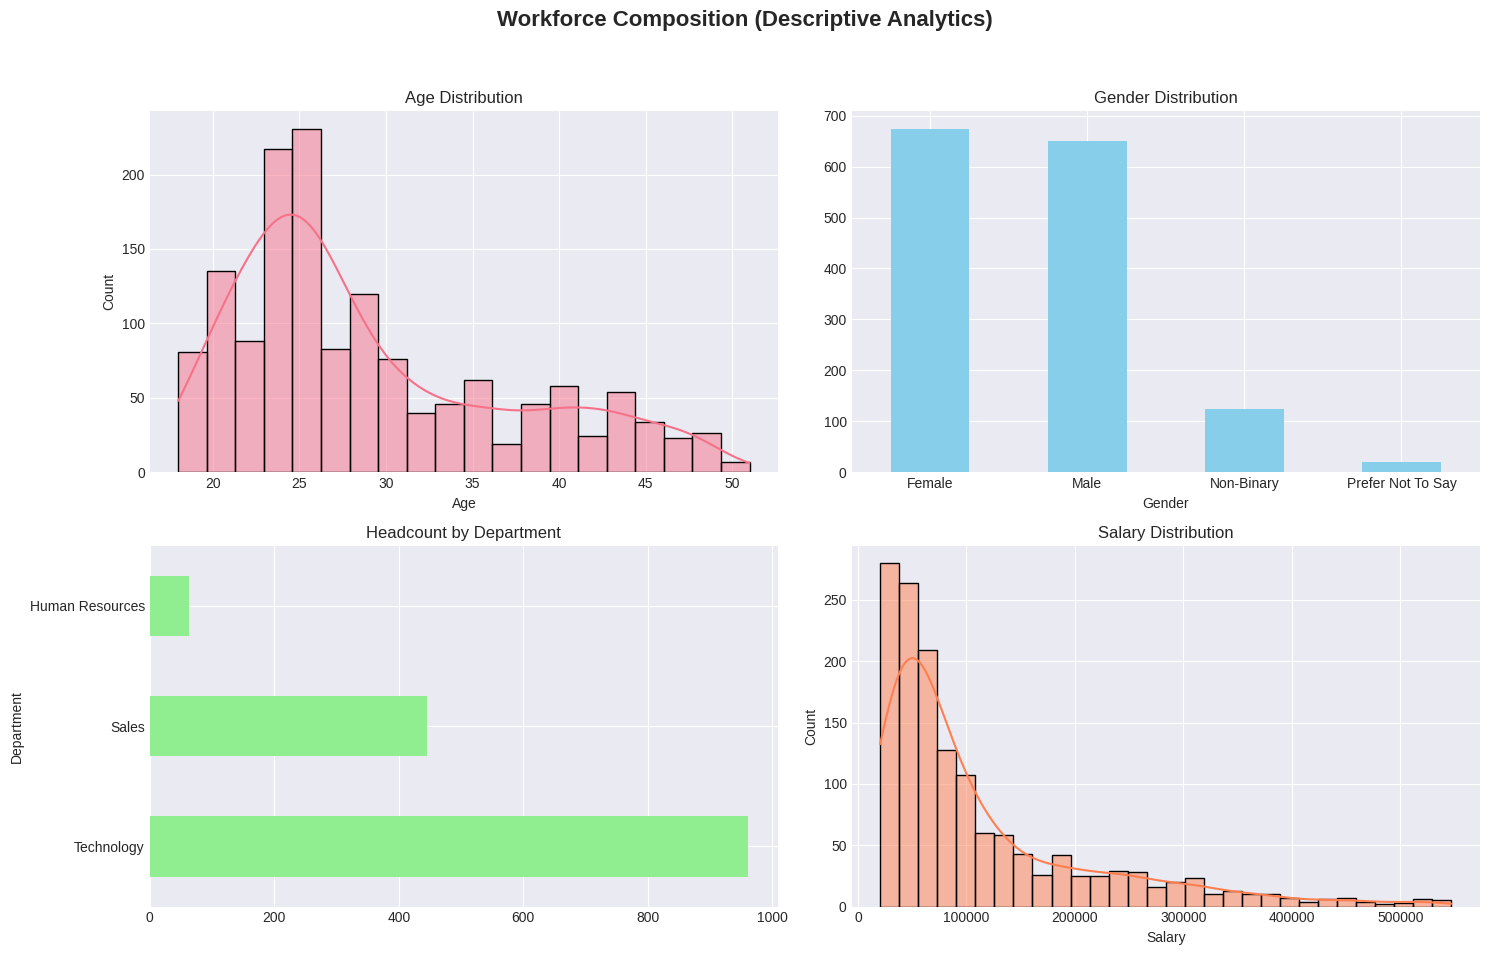

In [523]:
print("📈 Generating Workforce Composition Plots (Descriptive)...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Workforce Composition (Descriptive Analytics)', fontsize=16, fontweight='bold')

# --- Age Distribution ---
sns.histplot(final_df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# --- Gender Distribution ---
final_df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].tick_params(axis='x', rotation=0)

# --- Department Distribution (Count) ---
final_df['Department'].value_counts().plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Headcount by Department')

# --- Salary Distribution ---
sns.histplot(final_df['Salary'], bins=30, kde=True, ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Salary Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

📊 Generating 2x2 General EDA Dashboard (Using CORRECT Labels)...
   Plotting Q1: Age vs. Satisfaction...
   Plotting Q8: Education vs. Salary...
   Plotting Q2: Job Role vs. Salary...
   Plotting Q11: Manager Rating vs. Job Satisfaction...


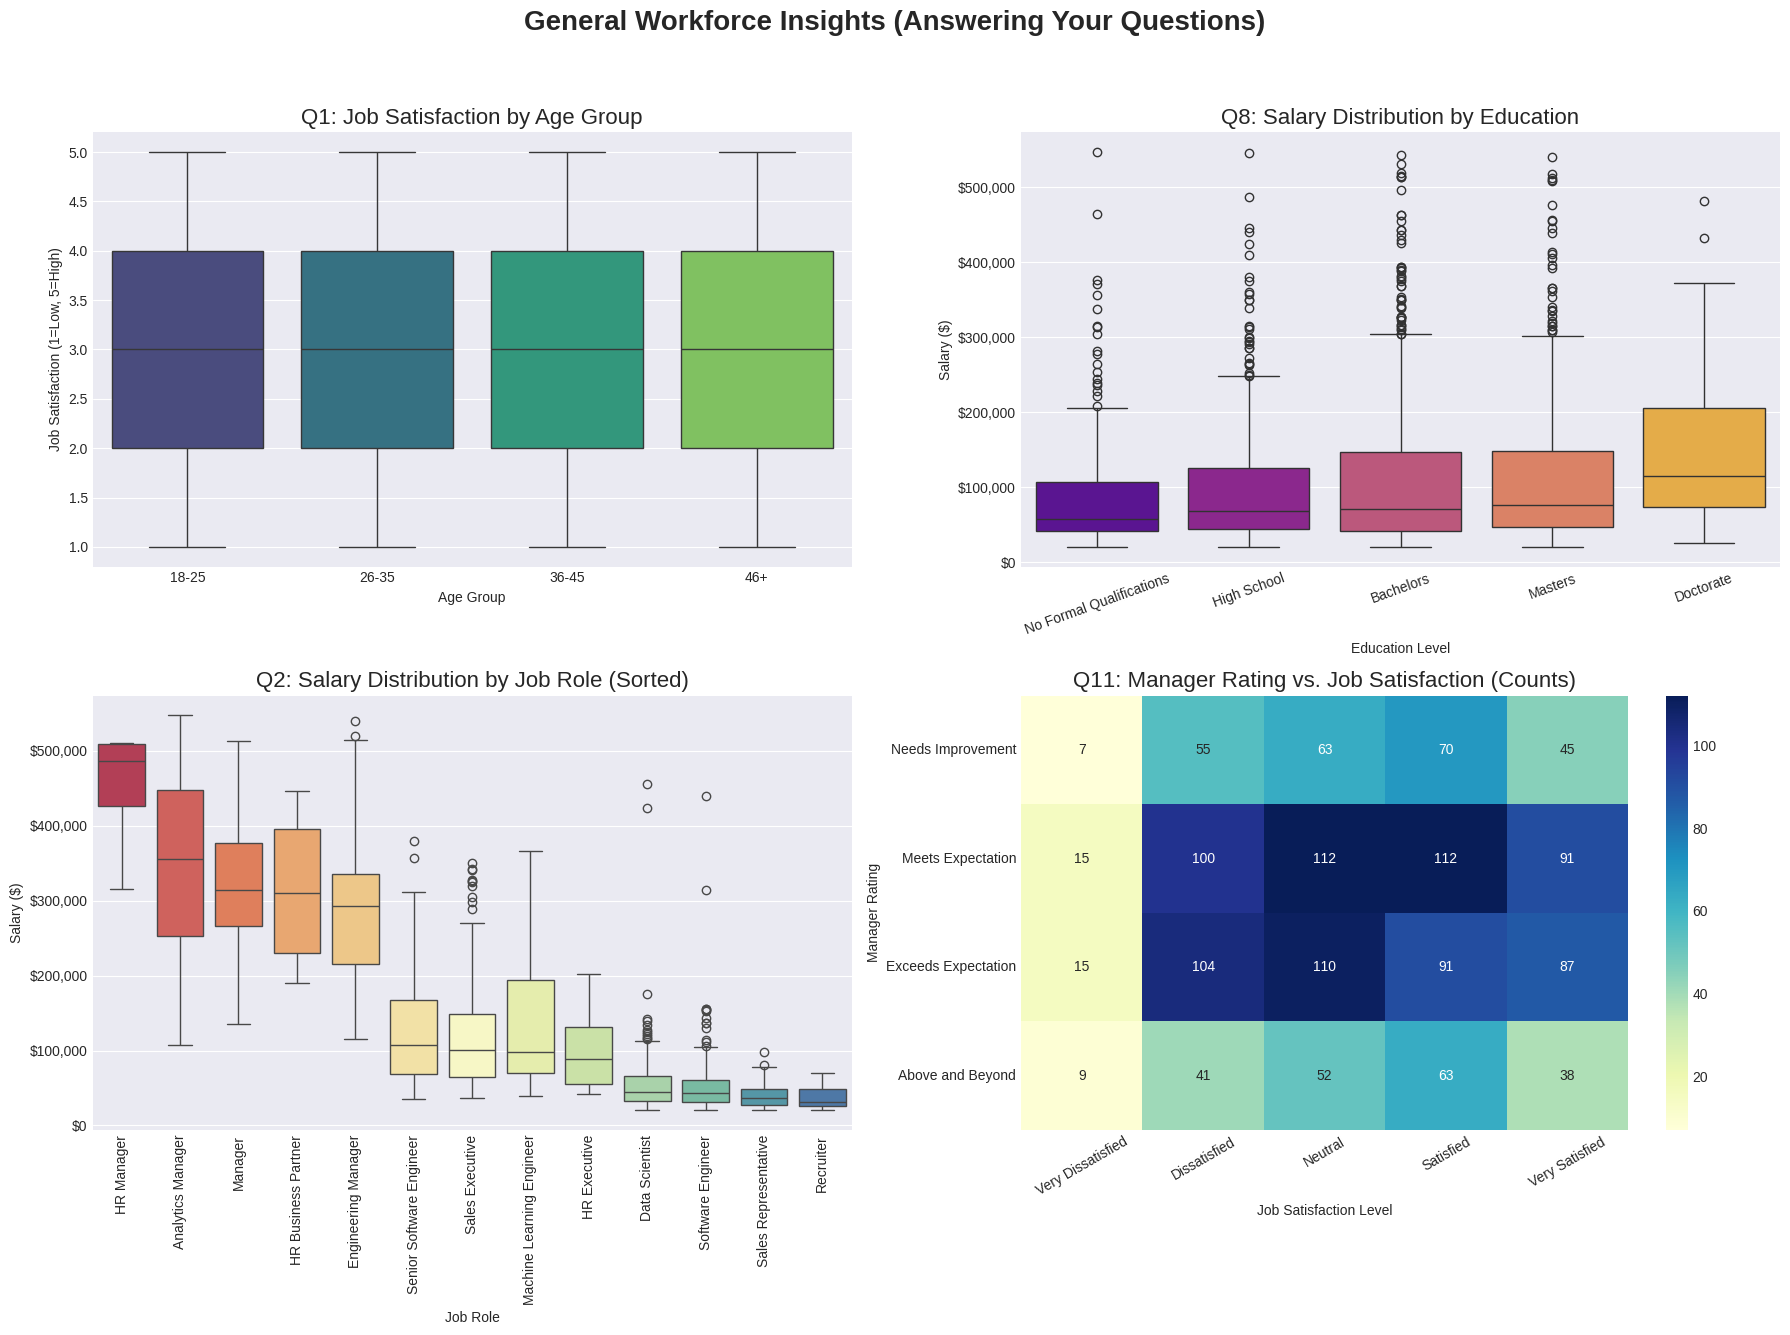

In [524]:
print("📊 Generating 2x2 General EDA Dashboard (Using CORRECT Labels)...")

# --- Import the formatter (just in case) ---
from matplotlib.ticker import FuncFormatter

# --- Setup the 2x2 plot grid ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('General Workforce Insights (Answering Your Questions)', fontsize=20, fontweight='bold')

# --- PLOT 1 (Top-Left): Q1 - Age Group vs. Job Satisfaction ---
# (This plot was correct)
print("   Plotting Q1: Age vs. Satisfaction...")
try:
    age_order = ['18-25', '26-35', '36-45', '46+']
    sns.boxplot(data=final_df, x='AgeGroup', y='JobSatisfaction', ax=axes[0, 0],
                order=age_order, palette='viridis')
    axes[0, 0].set_title('Q1: Job Satisfaction by Age Group', fontsize=16)
    axes[0, 0].set_ylabel('Job Satisfaction (1=Low, 5=High)')
    axes[0, 0].set_xlabel('Age Group')
except Exception as e:
    axes[0, 0].text(0.5, 0.5, f"Error: {e}", ha='center')


# --- PLOT 2 (Top-Right): Q8 - Education Level vs. Salary ---
# (This plot was correct)
print("   Plotting Q8: Education vs. Salary...")
try:
    edu_order = ['No Formal Qualifications', 'High School', 'Bachelors', 'Masters', 'Doctorate']
    sns.boxplot(data=final_df, x='EducationLabel', y='Salary', ax=axes[0, 1],
                order=edu_order, palette='plasma')
    axes[0, 1].set_title('Q8: Salary Distribution by Education', fontsize=16)
    axes[0, 1].set_ylabel('Salary ($)')
    axes[0, 1].set_xlabel('Education Level')
    axes[0, 1].tick_params(axis='x', rotation=20)
    axes[0, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))
except Exception as e:
    axes[0, 1].text(0.5, 0.5, f"Error: {e}", ha='center')


# --- PLOT 3 (Bottom-Left): Q2 - Job Role vs. Salary ---
# (This plot was correct)
print("   Plotting Q2: Job Role vs. Salary...")
try:
    role_salary_order = (final_df.dropna(subset=['Salary', 'JobRole'])
                         .groupby('JobRole')['Salary']
                         .median()
                         .sort_values(ascending=False)
                         .index)
    sns.boxplot(data=final_df, x='JobRole', y='Salary', ax=axes[1, 0],
                order=role_salary_order, palette='Spectral')
    axes[1, 0].set_title('Q2: Salary Distribution by Job Role (Sorted)', fontsize=16)
    axes[1, 0].set_ylabel('Salary ($)')
    axes[1, 0].set_xlabel('Job Role')
    axes[1, 0].tick_params(axis='x', rotation=90)
    axes[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))
except Exception as e:
    axes[1, 0].text(0.5, 0.5, f"Error: {e}", ha='center')


# --- PLOT 4 (Bottom-Right): Q11 - Manager Rating vs. Job Satisfaction ---
# (This plot now uses the *real* labels from your [Test 2] output)
print("   Plotting Q11: Manager Rating vs. Job Satisfaction...")
try:
    # 1. Create crosstab
    ctab = pd.crosstab(final_df['ManagerRatingLabel'], final_df['JobSatisfactionLabel'])

    # --- MODIFICATION: Using the REAL labels from [Test 2] ---
    sat_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
    mgr_order = ['Needs Improvement', 'Meets Expectation', 'Exceeds Expectation', 'Above and Beyond']

    # Reindex using the correct names
    ctab = ctab.reindex(columns=sat_order, index=mgr_order)
    # --- END OF MODIFICATION ---

    # 3. Fill NaN (for combinations that don't exist) with 0
    ctab_filled = ctab.fillna(0).astype(int)

    # 4. Plot
    sns.heatmap(ctab_filled, ax=axes[1, 1], annot=True, fmt='d', cmap='YlGnBu')
    axes[1, 1].set_title('Q11: Manager Rating vs. Job Satisfaction (Counts)', fontsize=16)
    axes[1, 1].set_ylabel('Manager Rating')
    axes[1, 1].set_xlabel('Job Satisfaction Level')
    axes[1, 1].tick_params(axis='x', rotation=30)
    axes[1, 1].tick_params(axis='y', rotation=0)

except Exception as e:
    axes[1, 1].text(0.5, 0.5, f"Error: {e}", ha='center')


# --- Finalize and Show ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Attrition Analysis

📊 Generating Attrition Analysis (Pie Chart & Rate by Department)...


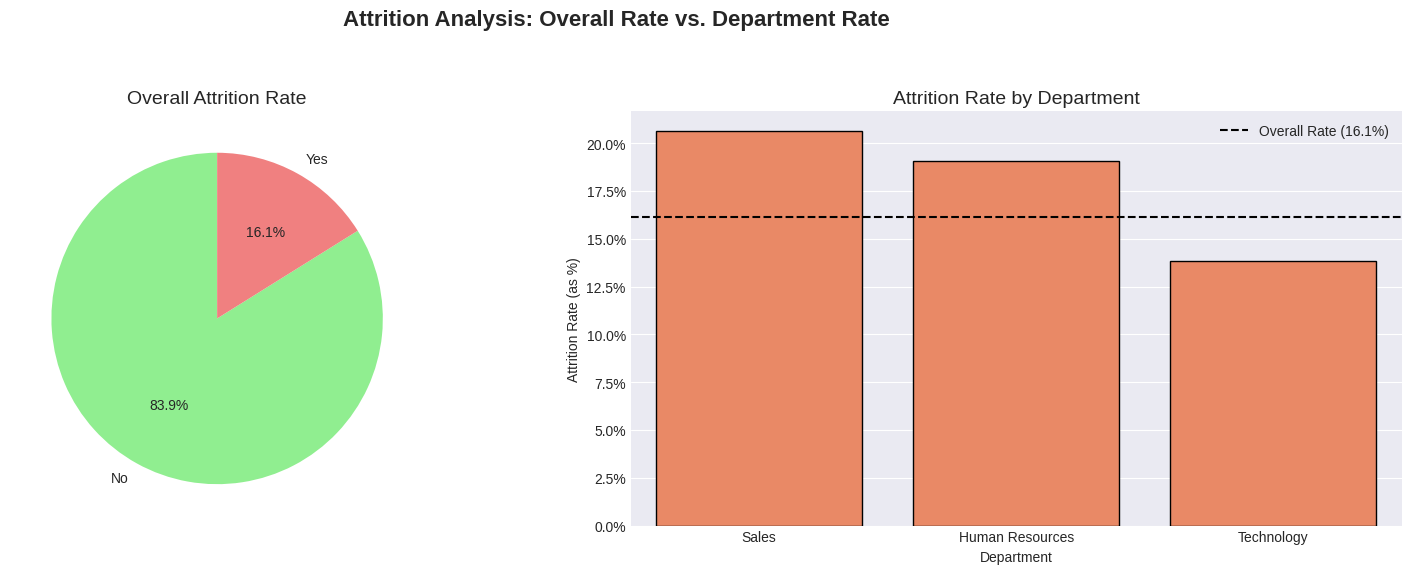

✅ Visualization saved as: attrition_analysis.png


In [525]:
print("📊 Generating Attrition Analysis (Pie Chart & Rate by Department)...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Analysis: Overall Rate vs. Department Rate', fontsize=16, fontweight='bold')


# --- PLOT 1: Overall Attrition Rate ---
attrition_counts = final_df['Attrition'].value_counts()
axes[0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Overall Attrition Rate', fontsize=14)


# --- PLOT 2: Attrition *Rate* by Department ---

# 1. Calculate the Attrition Rate (Percentage) per Department
rate_map = (final_df.groupby('Department')['Attrition']
                .apply(lambda x: (x == 'Yes').mean())
                .sort_values(ascending=False))

# 2. Plot the result
sns.barplot(x=rate_map.index, y=rate_map.values, ax=axes[1], color='coral', edgecolor='black')

# 3. Add the average line for context
overall_rate = final_df['Attrition'].value_counts(normalize=True)['Yes']
axes[1].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Rate ({overall_rate:.1%})')

axes[1].set_title('Attrition Rate by Department', fontsize=14)
axes[1].set_ylabel('Attrition Rate (as %)')
axes[1].set_xlabel('Department')
axes[1].legend()

# Format Y-axis as percentage
from matplotlib.ticker import PercentFormatter
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))


plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.savefig('attrition_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ Visualization saved as: attrition_analysis.png')

📊 Generating 2x2 Attrition Driver Dashboard ...


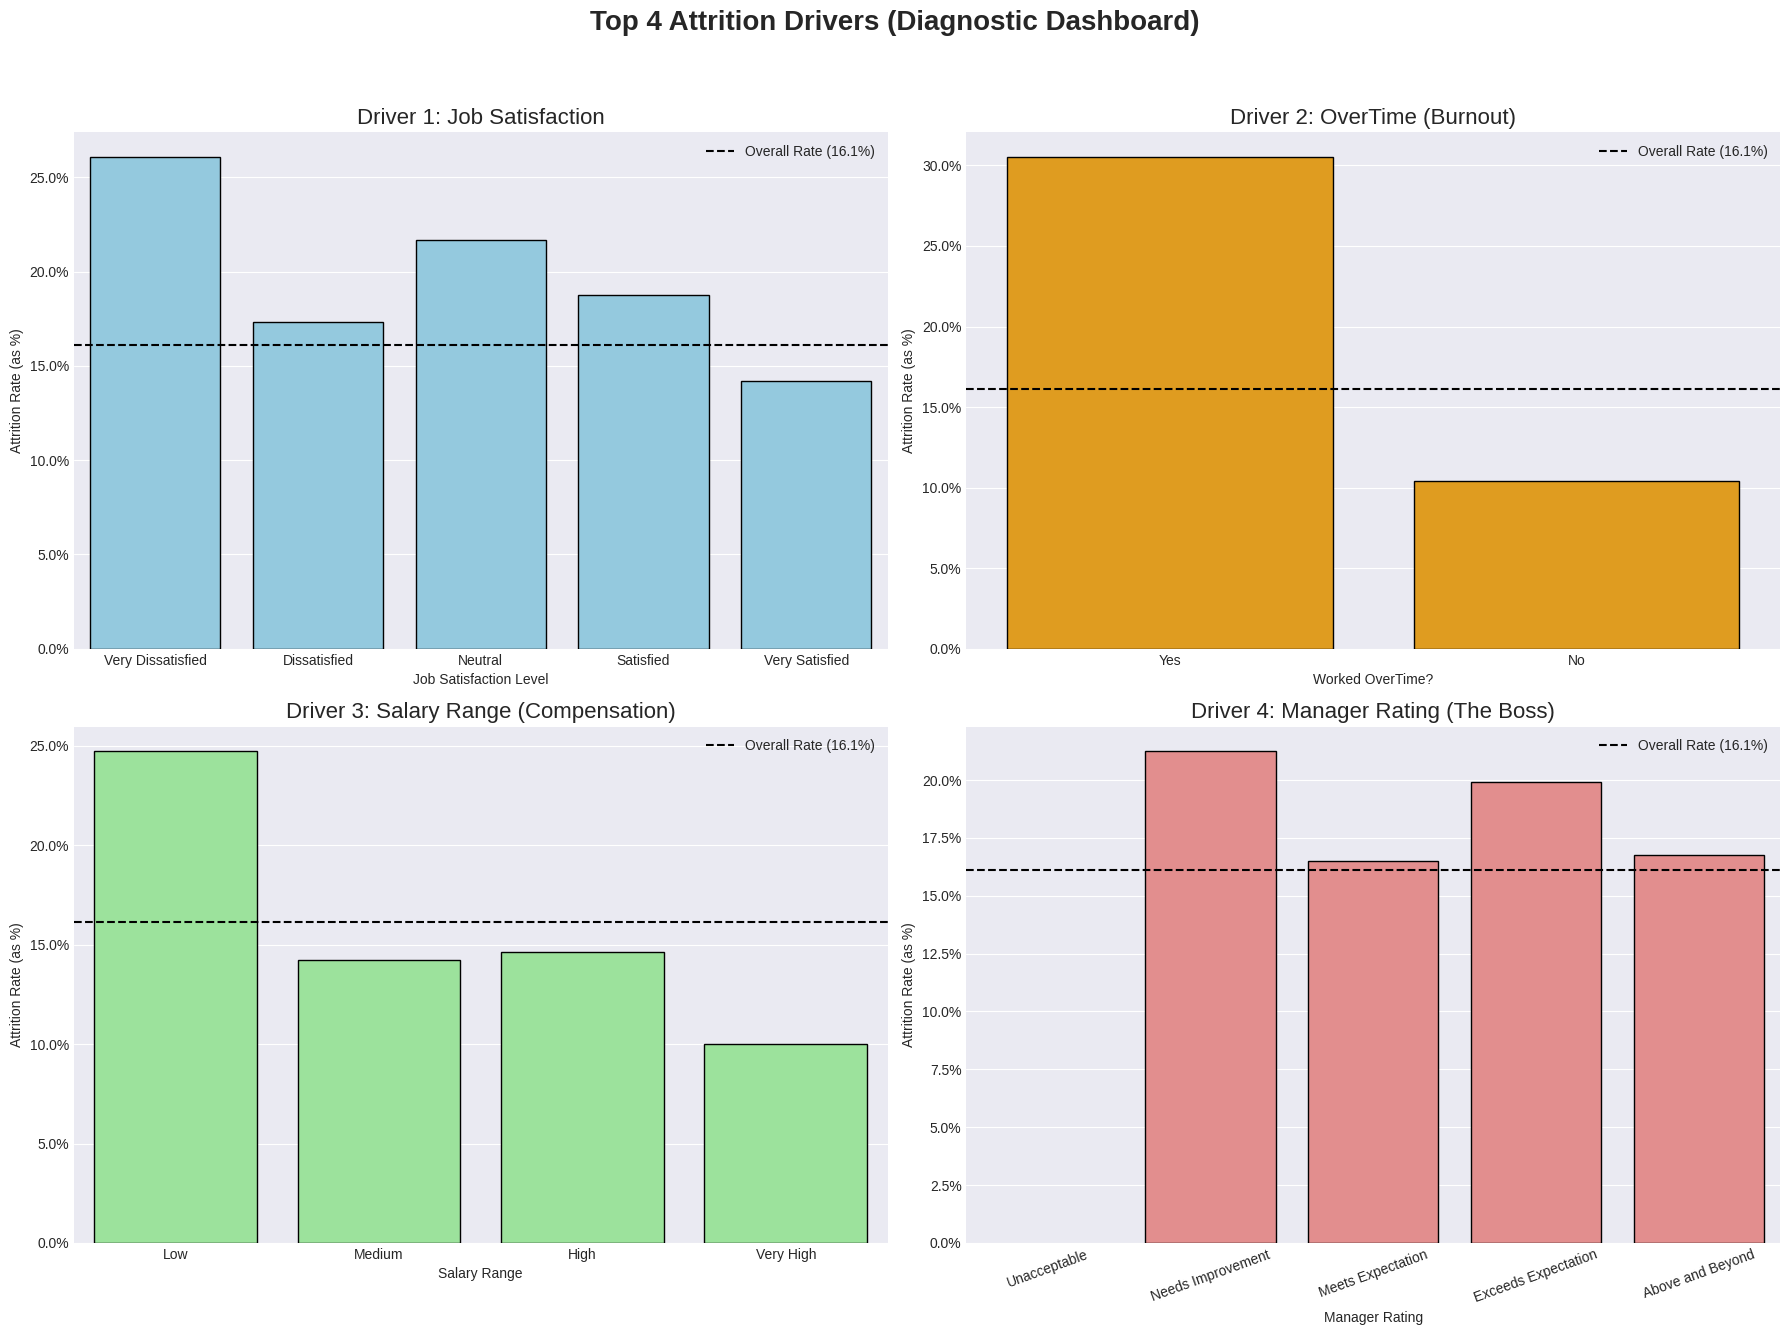

In [526]:
print("📊 Generating 2x2 Attrition Driver Dashboard ...")

# --- Setup the 2x2 plot grid ---
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # (Width, Height)
fig.suptitle('Top 4 Attrition Drivers (Diagnostic Dashboard)', fontsize=20, fontweight='bold')

# --- Get the Overall Rate (we'll use it in all plots) ---
overall_rate = final_df['Attrition'].value_counts(normalize=True)['Yes']


# --- PLOT 1 (Top-Left): Attrition by Job Satisfaction ---

rate_map_sat = (final_df.dropna(subset=['JobSatisfactionLabel'])
                .groupby('JobSatisfactionLabel')['Attrition']
                .apply(lambda x: (x == 'Yes').mean()))

order_sat = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
sns.barplot(x=rate_map_sat.index, y=rate_map_sat.values, ax=axes[0, 0],
            color='skyblue', edgecolor='black', order=order_sat)

axes[0, 0].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Rate ({overall_rate:.1%})')
axes[0, 0].set_title('Driver 1: Job Satisfaction', fontsize=16)
axes[0, 0].set_ylabel('Attrition Rate (as %)')
axes[0, 0].set_xlabel('Job Satisfaction Level')
axes[0, 0].legend()
axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

# --- PLOT 2 (Top-Right): Attrition by OverTime ---

rate_map_ot = (final_df.groupby('OverTime')['Attrition']
                .apply(lambda x: (x == 'Yes').mean())
                .sort_values(ascending=False))

# The index is just ['Yes', 'No'], no order is needed.
sns.barplot(x=rate_map_ot.index, y=rate_map_ot.values, ax=axes[0, 1],
            color='orange', edgecolor='black')

axes[0, 1].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Rate ({overall_rate:.1%})')
axes[0, 1].set_title('Driver 2: OverTime (Burnout)', fontsize=16)
axes[0, 1].set_ylabel('Attrition Rate (as %)')
axes[0, 1].set_xlabel('Worked OverTime?')
axes[0, 1].legend()
axes[0, 1].yaxis.set_major_formatter(PercentFormatter(1.0))


# --- PLOT 3 (Bottom-Left): Attrition by Salary Range ---

rate_map_sal = (final_df.dropna(subset=['SalaryRange'])
                .groupby('SalaryRange')['Attrition']
                .apply(lambda x: (x == 'Yes').mean()))

order_sal = ['Low', 'Medium', 'High', 'Very High'] # This one was correct

sns.barplot(x=rate_map_sal.index, y=rate_map_sal.values, ax=axes[1, 0],
            color='lightgreen', edgecolor='black', order=order_sal)

axes[1, 0].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Rate ({overall_rate:.1%})')
axes[1, 0].set_title('Driver 3: Salary Range (Compensation)', fontsize=16)
axes[1, 0].set_ylabel('Attrition Rate (as %)')
axes[1, 0].set_xlabel('Salary Range')
axes[1, 0].legend()
axes[1, 0].yaxis.set_major_formatter(PercentFormatter(1.0))


# --- PLOT 4 (Bottom-Right): Attrition by Manager Rating ---

rate_map_mgr = (final_df.dropna(subset=['ManagerRatingLabel'])
                .groupby('ManagerRatingLabel')['Attrition']
                .apply(lambda x: (x == 'Yes').mean()))

order_mgr = ['Unacceptable', 'Needs Improvement', 'Meets Expectation', 'Exceeds Expectation', 'Above and Beyond'] # This one was correct

sns.barplot(x=rate_map_mgr.index, y=rate_map_mgr.values, ax=axes[1, 1],
            color='lightcoral', edgecolor='black', order=order_mgr)

axes[1, 1].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Rate ({overall_rate:.1%})')
axes[1, 1].set_title('Driver 4: Manager Rating (The Boss)', fontsize=16)
axes[1, 1].set_ylabel('Attrition Rate (as %)')
axes[1, 1].set_xlabel('Manager Rating')
axes[1, 1].tick_params(axis='x', rotation=20) # Rotate labels slightly
axes[1, 1].legend()
axes[1, 1].yaxis.set_major_formatter(PercentFormatter(1.0))

# --- Finalize and Show ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for the main title
plt.show()

# Overtime is vital, lets check it by departments

📊 Generating OverTime *Rate* by Department (Advanced Diagnostic)...


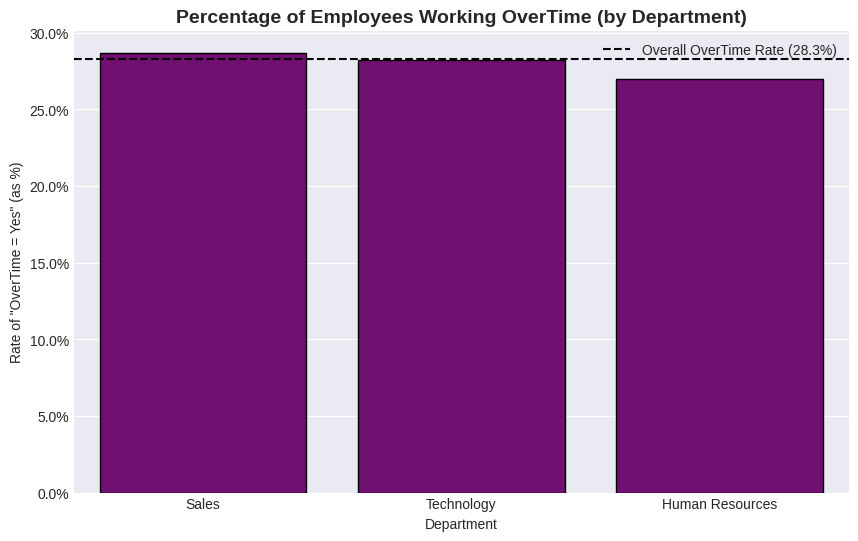

In [527]:
print("📊 Generating OverTime *Rate* by Department (Advanced Diagnostic)...")


overtime_rate_dept = final_df.groupby('Department')['OverTime'].value_counts(normalize=True).unstack()['Yes']
overtime_rate_dept = overtime_rate_dept.sort_values(ascending=False)

overtime_rate_dept = (final_df.groupby('Department')['OverTime']
                      .apply(lambda x: (x == 'Yes').mean())
                      .sort_values(ascending=False))


plt.figure(figsize=(10, 6))
sns.barplot(x=overtime_rate_dept.index, y=overtime_rate_dept.values, color='purple', edgecolor='black')

#Get the Overall Rate
overall_ot_rate = final_df['OverTime'].value_counts(normalize=True)['Yes']
plt.axhline(y=overall_ot_rate, color='black', linestyle='--', label=f'Overall OverTime Rate ({overall_ot_rate:.1%})')

plt.title('Percentage of Employees Working OverTime (by Department)', fontsize=14, fontweight='bold')
plt.ylabel('Rate of "OverTime = Yes" (as %)')
plt.xlabel('Department')
plt.legend()

# Format Y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

# Explore issues with sales department

📊 Generating 2x2 *Sales Department* Attrition Dashboard...
   Analyzing 446 employees in 'Sales'...


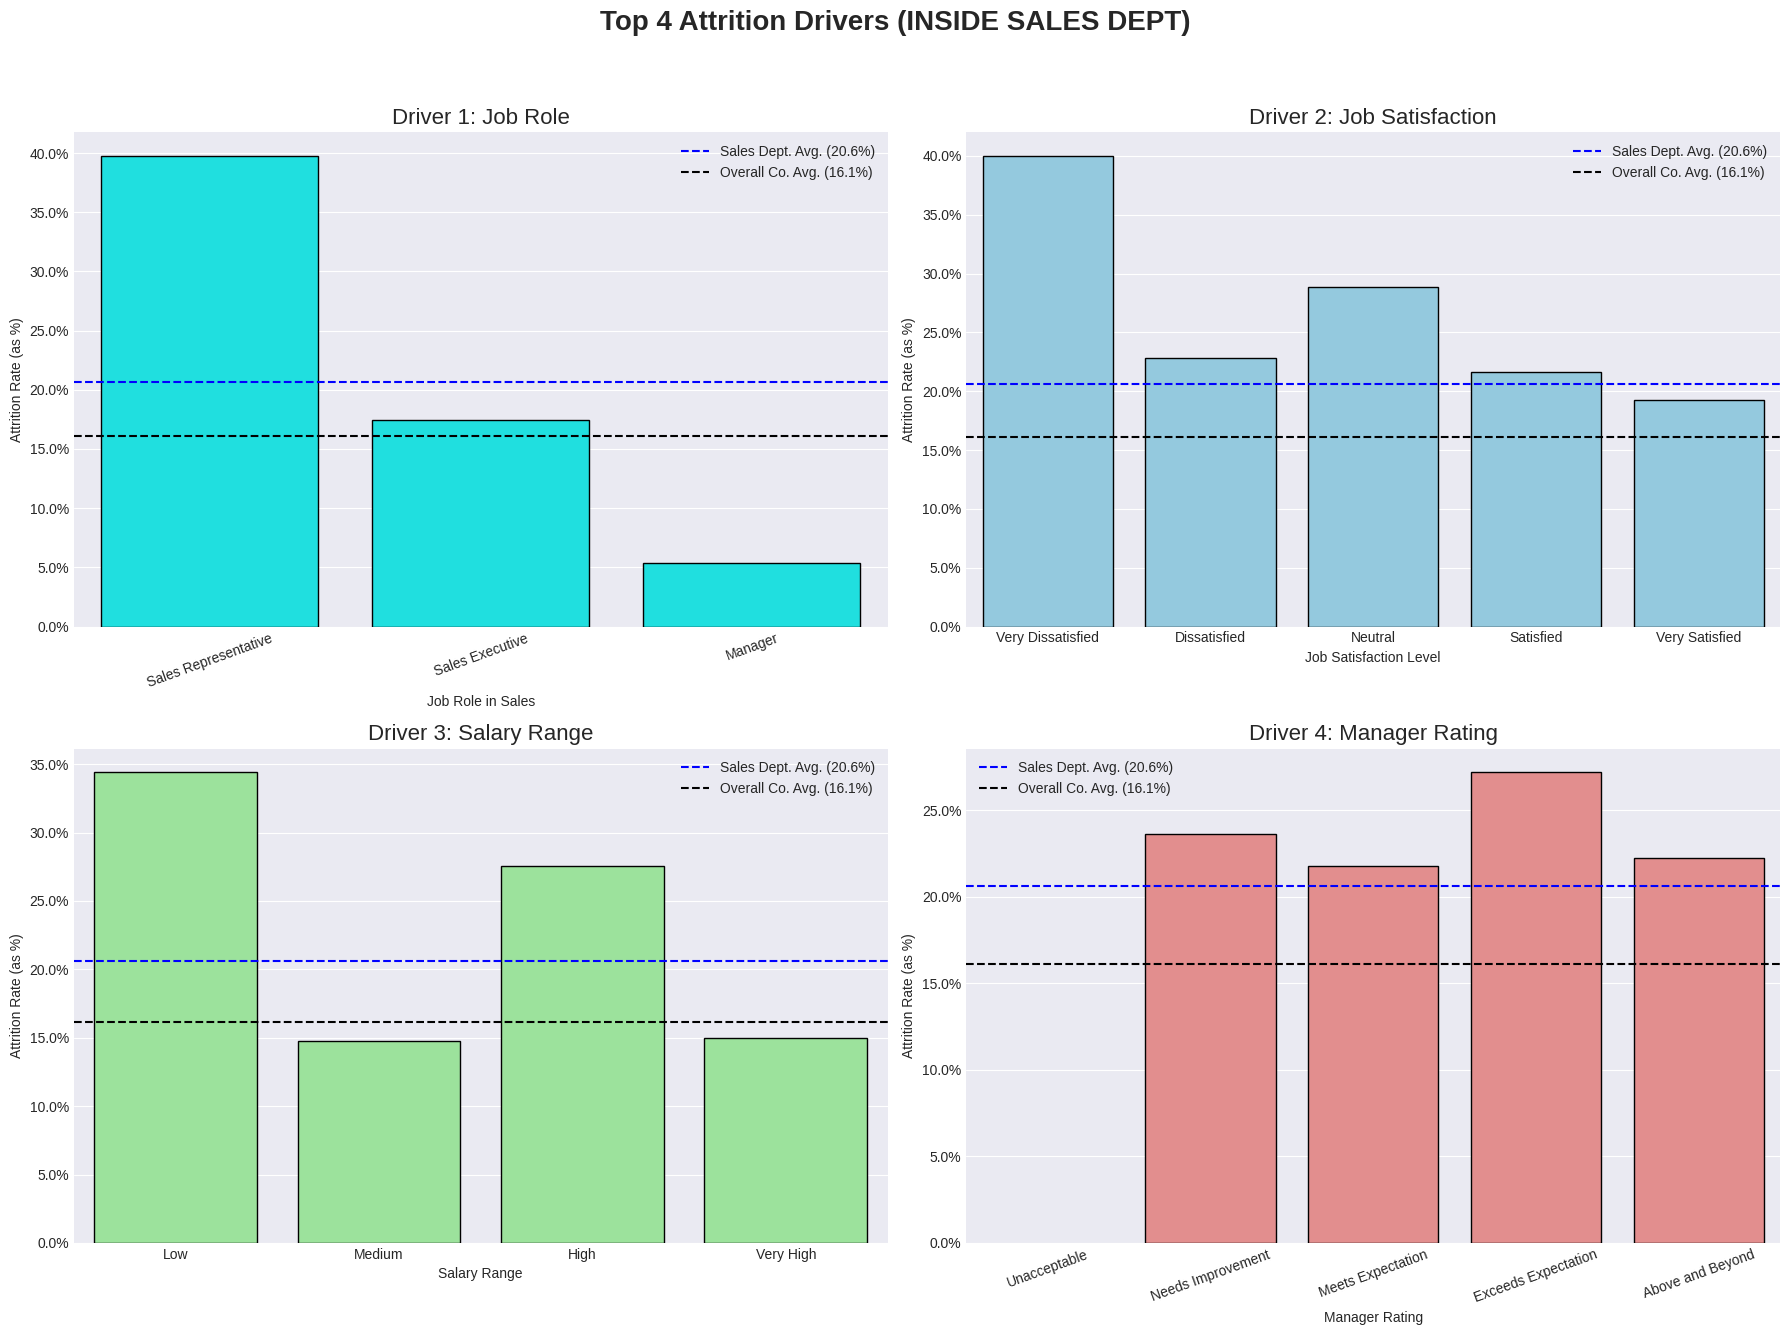

In [528]:
print("📊 Generating 2x2 *Sales Department* Attrition Dashboard...")

# --- 1. Filter for 'Sales' Department ONLY ---
sales_df = final_df[final_df['Department'] == 'Sales'].copy()
if sales_df.empty:
    print("❌ ERROR: No data found for 'Sales' department. Stopping.")
else:
    print(f"   Analyzing {len(sales_df)} employees in 'Sales'...")

    # --- 2. Setup the 2x2 plot grid ---
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Top 4 Attrition Drivers (INSIDE SALES DEPT)', fontsize=20, fontweight='bold')

    # --- 3. Get the *TWO* average rates for comparison ---
    # The company average (we already have this)
    # overall_rate = final_df['Attrition'].value_counts(normalize=True)['Yes']

    # The Sales department average (This is our new primary benchmark)
    sales_avg_rate = sales_df['Attrition'].value_counts(normalize=True)['Yes']

    from matplotlib.ticker import PercentFormatter

    # --- PLOT 1 (Top-Left): Attrition by Job Role (within Sales) ---
    try:
        rate_map = (sales_df.groupby('JobRole')['Attrition']
                    .apply(lambda x: (x == 'Yes').mean())
                    .sort_values(ascending=False))

        sns.barplot(x=rate_map.index, y=rate_map.values, ax=axes[0, 0],
                    color='cyan', edgecolor='black')

        axes[0, 0].axhline(y=sales_avg_rate, color='blue', linestyle='--', label=f'Sales Dept. Avg. ({sales_avg_rate:.1%})')
        axes[0, 0].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Co. Avg. ({overall_rate:.1%})')
        axes[0, 0].set_title('Driver 1: Job Role', fontsize=16)
        axes[0, 0].set_ylabel('Attrition Rate (as %)')
        axes[0, 0].set_xlabel('Job Role in Sales')
        axes[0, 0].tick_params(axis='x', rotation=20)
        axes[0, 0].legend()
        axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

    except Exception as e:
        axes[0, 0].text(0.5, 0.5, f"Error: {e}", ha='center')

    # --- PLOT 2 (Top-Right): Attrition by Job Satisfaction (within Sales) ---
    try:
        rate_map = (sales_df.dropna(subset=['JobSatisfactionLabel'])
                    .groupby('JobSatisfactionLabel')['Attrition']
                    .apply(lambda x: (x == 'Yes').mean()))

        order_sat = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

        sns.barplot(x=rate_map.index, y=rate_map.values, ax=axes[0, 1],
                    color='skyblue', edgecolor='black', order=order_sat)

        axes[0, 1].axhline(y=sales_avg_rate, color='blue', linestyle='--', label=f'Sales Dept. Avg. ({sales_avg_rate:.1%})')
        axes[0, 1].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Co. Avg. ({overall_rate:.1%})')
        axes[0, 1].set_title('Driver 2: Job Satisfaction', fontsize=16)
        axes[0, 1].set_ylabel('Attrition Rate (as %)')
        axes[0, 1].set_xlabel('Job Satisfaction Level')
        axes[0, 1].legend()
        axes[0, 1].yaxis.set_major_formatter(PercentFormatter(1.0))

    except Exception as e:
        axes[0, 1].text(0.5, 0.5, f"Error: {e}", ha='center')

    # --- PLOT 3 (Bottom-Left): Attrition by Salary Range (within Sales) ---
    try:
        rate_map = (sales_df.dropna(subset=['SalaryRange'])
                    .groupby('SalaryRange')['Attrition']
                    .apply(lambda x: (x == 'Yes').mean()))

        order_sal = ['Low', 'Medium', 'High', 'Very High']

        sns.barplot(x=rate_map.index, y=rate_map.values, ax=axes[1, 0],
                    color='lightgreen', edgecolor='black', order=order_sal)

        axes[1, 0].axhline(y=sales_avg_rate, color='blue', linestyle='--', label=f'Sales Dept. Avg. ({sales_avg_rate:.1%})')
        axes[1, 0].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Co. Avg. ({overall_rate:.1%})')
        axes[1, 0].set_title('Driver 3: Salary Range', fontsize=16)
        axes[1, 0].set_ylabel('Attrition Rate (as %)')
        axes[1, 0].set_xlabel('Salary Range')
        axes[1, 0].legend()
        axes[1, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

    except Exception as e:
        axes[1, 0].text(0.5, 0.5, f"Error: {e}", ha='center')

    # --- PLOT 4 (Bottom-Right): Attrition by Manager Rating (within Sales) ---
    try:
        rate_map = (sales_df.dropna(subset=['ManagerRatingLabel'])
                    .groupby('ManagerRatingLabel')['Attrition']
                    .apply(lambda x: (x == 'Yes').mean()))

        order_mgr = ['Unacceptable', 'Needs Improvement', 'Meets Expectation', 'Exceeds Expectation', 'Above and Beyond']

        sns.barplot(x=rate_map.index, y=rate_map.values, ax=axes[1, 1],
                    color='lightcoral', edgecolor='black', order=order_mgr)

        axes[1, 1].axhline(y=sales_avg_rate, color='blue', linestyle='--', label=f'Sales Dept. Avg. ({sales_avg_rate:.1%})')
        axes[1, 1].axhline(y=overall_rate, color='black', linestyle='--', label=f'Overall Co. Avg. ({overall_rate:.1%})')
        axes[1, 1].set_title('Driver 4: Manager Rating', fontsize=16)
        axes[1, 1].set_ylabel('Attrition Rate (as %)')
        axes[1, 1].set_xlabel('Manager Rating')
        axes[1, 1].tick_params(axis='x', rotation=20)
        axes[1, 1].legend()
        axes[1, 1].yaxis.set_major_formatter(PercentFormatter(1.0))

    except Exception as e:
        axes[1, 1].text(0.5, 0.5, f"Error: {e}", ha='center')

    # --- Finalize and Show ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

📊 Generating Job Satisfaction Levels *by* Job Role (Q20)...


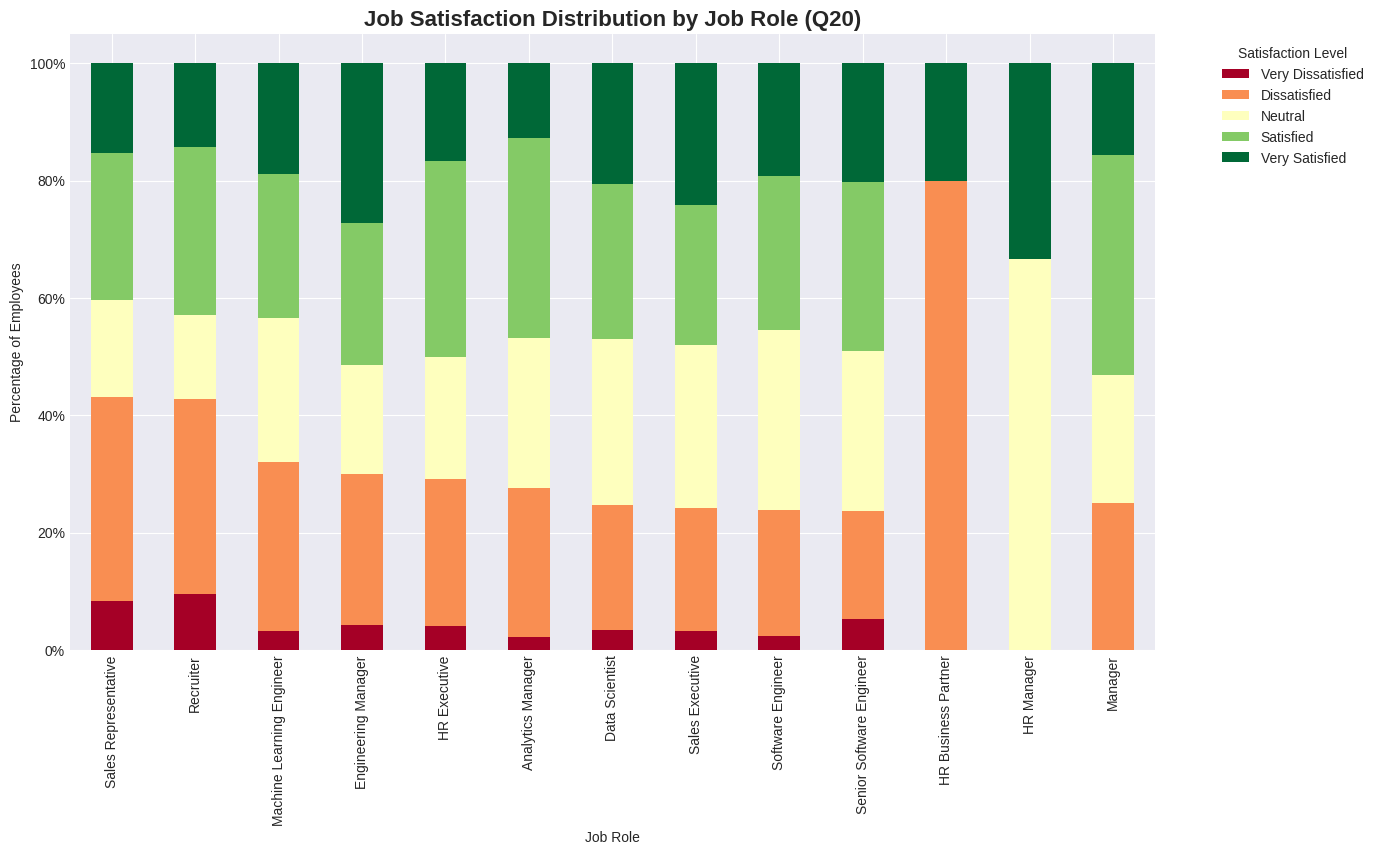

In [529]:
print("📊 Generating Job Satisfaction Levels *by* Job Role (Q20)...")

# 1. We need to calculate the *percentage* of each satisfaction level for each job role
# This calculates the % of 'Very Dissatisfied', 'Dissatisfied', etc. for each role
role_satisfaction_dist = final_df.groupby('JobRole')['JobSatisfactionLabel'].value_counts(normalize=True).unstack()

# 2. Re-order the columns logically
satisfaction_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
role_satisfaction_dist = role_satisfaction_dist[satisfaction_order]

# 3. Sort the roles by the *worst* satisfaction
# We sort by 'Very Dissatisfied' + 'Dissatisfied' to see the unhappiest roles
role_satisfaction_dist['Unhappy%'] = role_satisfaction_dist['Very Dissatisfied'] + role_satisfaction_dist['Dissatisfied']
role_satisfaction_dist = role_satisfaction_dist.sort_values(by='Unhappy%', ascending=False)

# 4. Plot the 100% Stacked Bar Chart
ax = role_satisfaction_dist[satisfaction_order].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    cmap='RdYlGn' # Red-to-Green colormap
)

plt.title('Job Satisfaction Distribution by Job Role (Q20)', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Employees')
plt.xlabel('Job Role')
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format Y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

# PHASE 3
### preprocessing

In [530]:
print("--- Phase 3: Step 1: Preprocessing ---")

# 1. Drop rows with NaN (the 190 employees)
# The model can't learn from data it doesn't have.
model_df = final_df.dropna(subset=[
    'JobSatisfactionLabel', 'ManagerRatingLabel'
]).copy()
print(f"Original shape: {final_df.shape}, Model shape after dropping NaN: {model_df.shape}")

# 2. Convert the target variable 'Attrition' to 1s and 0s
model_df['Attrition_Target'] = model_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Select ALL features (X) and the Target (y)
# 'y' is what we want to predict
y = model_df['Attrition_Target']

# 'X' is all the "clues" we'll use
# We select *all* relevant columns (numeric and text)
features = [
    'Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany',
    'Gender', 'Department', 'JobRole', 'MaritalStatus',
    'EducationLabel', 'OverTime', 'JobSatisfactionLabel',
    'ManagerRatingLabel', 'SalaryRange'
]
X_categorical = model_df[features]

# 4. Use pd.get_dummies() to convert all text columns at once
# This is the "magic" step that turns text into numbers
X = pd.get_dummies(X_categorical, drop_first=True)

print("✅ Preprocessing complete. 'X' and 'y' are ready.")
print("X (features) shape:", X.shape)
display(X.head())

--- Phase 3: Step 1: Preprocessing ---
Original shape: (1470, 43), Model shape after dropping NaN: (1280, 43)
✅ Preprocessing complete. 'X' and 'y' are ready.
X (features) shape: (1280, 38)


,Age,DistanceFromHome (KM),Salary,YearsAtCompany,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Department_Sales,Department_Technology,JobRole_Data Scientist,JobRole_Engineering Manager,JobRole_HR Business Partner,JobRole_HR Executive,JobRole_HR Manager,JobRole_Machine Learning Engineer,JobRole_Manager,JobRole_Recruiter,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Senior Software Engineer,JobRole_Software Engineer,MaritalStatus_Married,MaritalStatus_Single,EducationLabel_Doctorate,EducationLabel_High School,EducationLabel_Masters,EducationLabel_No Formal Qualifications,OverTime_Yes,JobSatisfactionLabel_Neutral,JobSatisfactionLabel_Satisfied,JobSatisfactionLabel_Very Dissatisfied,JobSatisfactionLabel_Very Satisfied,ManagerRatingLabel_Exceeds Expectation,ManagerRatingLabel_Meets Expectation,ManagerRatingLabel_Needs Improvement,SalaryRange_Medium,SalaryRange_High,SalaryRange_Very High
0,30,27,102059,10,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,38,23,157718,10,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True
2,43,29,309964,10,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,39,12,293132,10,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
4,29,29,49606,6,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False


Train_Test Split

In [531]:
print("\n--- Phase 3: Step 2: Train-Test Split ---")
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape} rows")
print(f"Testing set: {X_test.shape} rows")
print("✅ Data split successfully.")


--- Phase 3: Step 2: Train-Test Split ---
Training set: (1024, 38) rows
Testing set: (256, 38) rows
✅ Data split successfully.


# Model Training

In [532]:
print("\n--- Phase 3: Step 3: Model Training ---")
from sklearn.linear_model import LogisticRegression
# We add 'max_iter' because the data is large
model = LogisticRegression(max_iter=1000,class_weight='balanced')

# This is the "learning" step
model.fit(X_train, y_train)

print("✅ Model trained successfully.")


--- Phase 3: Step 3: Model Training ---
✅ Model trained successfully.


# Model Evaluation

In [533]:
print("\n--- Phase 3: Step 4: Model Evaluation ---")
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the "test" data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Model Accuracy: {accuracy * 100:.2f}%")

# Print the detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Phase 3: Step 4: Model Evaluation ---
📊 Model Accuracy: 76.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       209
           1       0.42      0.81      0.55        47

    accuracy                           0.76       256
   macro avg       0.68      0.78      0.70       256
weighted avg       0.85      0.76      0.79       256



# Model Interpretation

In [534]:
print("\n--- Phase 3: Step 5: Model Interpretation (CALCULATION) ---")
print("   (Proving our EDA findings)")

# 1. Get the list of all feature names from X
feature_names = X.columns

# 2. Get the "coefficients" (weights) from the model
coefficients = model.coef_[0]

# 3. --- THIS IS THE CRITICAL LINE ---
#    This line *creates* the coeff_df
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 4. Sort by the *absolute* value to see the *most impactful* features
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print("✅ 'coeff_df' (the data for the plot) has been created successfully.")
display(coeff_df.head(10))


--- Phase 3: Step 5: Model Interpretation (CALCULATION) ---
   (Proving our EDA findings)
✅ 'coeff_df' (the data for the plot) has been created successfully.


,Feature,Coefficient,Abs_Coefficient
27,OverTime_Yes,1.661995,1.661995
22,MaritalStatus_Single,1.105398,1.105398
9,JobRole_Data Scientist,0.943675,0.943675
8,Department_Technology,-0.579944,0.579944
3,YearsAtCompany,-0.559986,0.559986
31,JobSatisfactionLabel_Very Satisfied,-0.539020,0.539020
14,JobRole_Machine Learning Engineer,-0.530196,0.530196
18,JobRole_Sales Representative,0.515126,0.515126
33,ManagerRatingLabel_Meets Expectation,-0.435387,0.435387
28,JobSatisfactionLabel_Neutral,0.388059,0.388059



--- Phase 3: Step 5 (Visualization) - THE FIX ---
   Visualizing the top features (using a more robust method)...


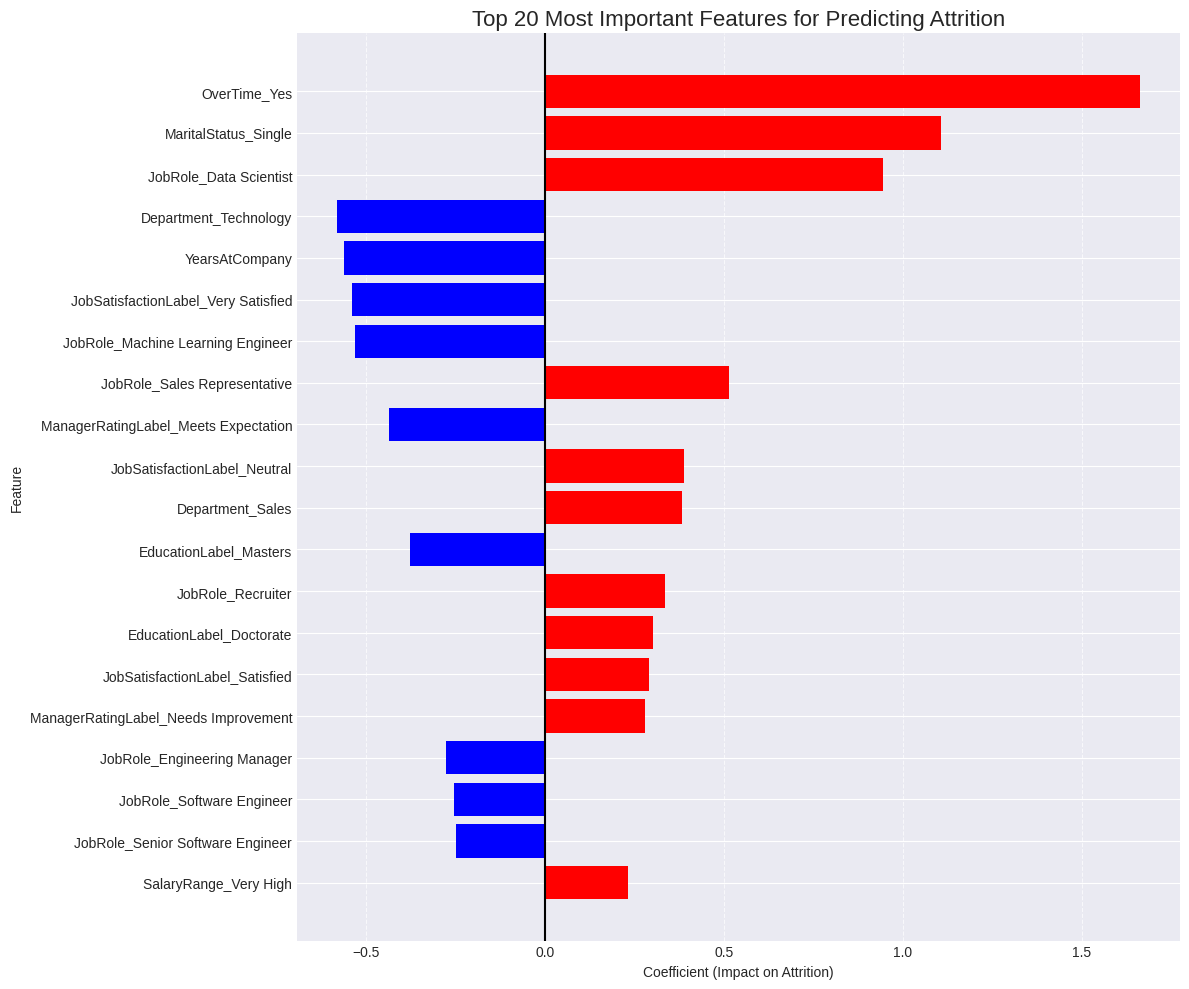

In [535]:
print("\n--- Phase 3: Step 5 (Visualization) - THE FIX ---")
print("   Visualizing the top features (using a more robust method)...")

# 1. Get the Top 20 features (coeff_df is already in memory)
top_n = 20
top_features = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).head(top_n)

# 2. Sort them so the most important is at the top of the chart
# (ascending=True is correct for barh plot to show biggest on top)
top_features = top_features.sort_values(by='Abs_Coefficient', ascending=True)

# 3. Create the 'Color' column (same as before)
top_features['Color'] = top_features['Coefficient'].apply(lambda x: 'red' if x > 0 else 'blue')

# 4. --- THIS IS THE FIX ---
# We switched from sns.barplot to plt.barh
# plt.barh() *directly* accepts a list of colors for each bar.
plt.figure(figsize=(12, 10))

plt.barh(
    y=top_features['Feature'],
    width=top_features['Coefficient'],
    color=top_features['Color']  # <-- This works perfectly in plt.barh
)

plt.title(f'Top {top_n} Most Important Features for Predicting Attrition', fontsize=16)
plt.xlabel('Coefficient (Impact on Attrition)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add grid for readability

# Add a vertical line at 0 for reference
plt.axvline(x=0, color='black', linestyle='-')

plt.tight_layout()
plt.show()

# FINAL REPORT AND CONCLUSION

# FULL REPORT

 # HR Attrition Analysis: A Case Study

**Project Report: From Raw Data to Root Cause Analysis and Predictive Modeling**

### 1. Executive Summary

This project analyzed a dataset of 1,470 employees to identify the primary drivers of employee attrition. The initial attrition rate was **16.1%**. Our analysis, combining Exploratory Data Analysis (EDA) and a predictive `LogisticRegression` model, concluded that attrition is not a random, company-wide issue.

The primary drivers are **OverTime** (a global driver) and **low Job Satisfaction**. The problem is heavily concentrated in the **`Sales`** department, specifically among **`Sales Representatives`**, who are the lowest-paid and most dissatisfied role in the company.

Our predictive model proves that **Salary is the** _**least**_ **important factor** in predicting attrition, with a coefficient of nearly zero (-0.000007). The model successfully identified at-risk employees with an **81% Recall**, confirming that retention efforts should focus on role satisfaction and burnout, not broad salary increases.

### 2. Introduction & Objective

The project's objective was to move beyond the simple 16.1% attrition metric and answer a complex "why." We aimed to build a data-driven model to:

1. **Identify** the key factors (drivers) correlated with attrition.
    
2. **Quantify** the impact of these drivers.
    
3. **Build** a useful predictive model to identify at-risk employees.
    
4. **Provide** actionable, data-backed recommendations.
    

### 3. Methodology & Technical Challenges Overcome

The analysis was conducted in three phases. Several technical challenges were identified and resolved during this process.

#### 3.1. Phase 1: Data Unification and Cleaning

- **Initial State:** 5 disparate CSV files (`Employee`, `PerformanceRating`, `EducationLevel`, etc.).
    
- **Technical Challenge 1: `1-to-Many` Relationship**
    
    - The `PerformanceRating` file contained 6,709 historical ratings for only 1,280 of the 1,470 employees. A direct merge was impossible.
        
    - **Methodology:** We decided to create a "snapshot" analysis of the _current_ employee state. We used `pandas` to filter for the **most recent review** for each employee by sorting by `ReviewDate` and applying `.drop_duplicates(subset='EmployeeID', keep='first')`.
        
    - **Result:** A 1-to-1 mapping, which revealed that **190 employees (13%) had no performance review data at all** (likely new hires). These `NaN` values were handled in subsequent phases.
        
- **Technical Challenge 2: "Dirty Data" and Blank Visuals**
    
    - Initial diagnostic plots (especially `heatmap`) were rendering blank or with all zero values.
        
    - **Methodology:** We ran a debugging cell to inspect the unique values of our categorical labels (e.g., `final_df['JobSatisfactionLabel'].unique()`).
        
    - **Solution:** We discovered **trailing spaces** in the raw data (e.g., `'Satisfied '` instead of `'Satisfied'`). This "dirty data" caused our `groupby` and `reindex` operations to fail silently. We resolved this by adding a **permanent cleaning step** to our Phase 1 pipeline, applying `.str.strip()` to all mapped label columns.
        

#### 3.2. Phase 2: Exploratory Data Analysis (EDA)

- **Methodology:** We started with high-level descriptive charts (e.g., demographics) and then moved to diagnostic plots (e.g., Attrition Rate by Department) to find "hotspots."
    
- All comparative analyses used **rate-based metrics (percentages)** instead of simple counts to avoid population bias (e.g., 'Sales' is large, so it will always have a high _count_ of attrition).
    
#### 3.3. Phase 3: Feature Preparation & Predictive Modeling

This phase involved preparing the data for the model, selecting a validation strategy, and handling technical challenges to build an interpretable model.

- **3.3.1. Feature Preparation (Encoding & Scaling)**
    
    - **Encoding:** To prepare the data for the model, we performed two key transformations. First, our target variable `Attrition` ('Yes'/'No') was encoded into `1` and `0`. Second, all categorical (text-based) features (e.g., `JobRole`, `Department`, `JobSatisfactionLabel`) were converted into numerical format using `pandas.get_dummies()`. This one-hot encoding technique creates binary columns for each category, allowing the linear model to interpret them.
        
    - **Scaling:** We made a conscious decision **not** to scale our numerical features (like `Age` or `Salary`). While scaling is often necessary for model convergence or regularization, our primary goal was **`Interpretability`**. By _not_ scaling, we can directly read the coefficients (e.g., `OverTime_Yes` = +1.66) and understand their real-world impact. Since the model converged successfully (using `max_iter=1000`), scaling was not strictly necessary and would have made interpreting the coefficients more difficult.
        
- **3.3.2. Model Validation Strategy (Train/Test Split)**
    
    - The `final_df` (after dropping 190 `NaN` rows) was split into a training set (80%) and a testing set (20%), using `test_size=0.2`.
        
    - We used a `random_state=42` to ensure our results are reproducible.
        
    - Crucially, we used **`stratify=y`** (where `y` is our Attrition target). This was essential because our data is imbalanced (16% 'Yes'). Stratification ensures that both the training and testing sets contain the same 16% proportion of attrition cases.
        
    - We did not use K-Fold Cross-Validation at this stage. Given the primary goal of `Interpretability` over robust accuracy, a single, stratified 80/20 split was deemed sufficient for this initial analysis.
        
- **3.3.3. Model Selection**
    
    - We chose `LogisticRegression` over more complex models like `RandomForest`.
        
    - **Reason:** Our primary goal was **`Interpretability`**, not just accuracy. We needed to extract the `coefficients` to quantify the _impact and direction_ of each feature, which this model provides.
        
- **3.3.4. Technical Challenge 4: `Imbalanced` Data**
    
    - Our target variable `Attrition` was highly imbalanced (16% 'Yes', 84% 'No').
        
    - **Problem:** The initial model yielded a "vanity" accuracy of 85.5% but a useless `Recall` of 0.53 (it missed 47% of employees who actually left).
        
    - **Solution:** We retrained the model using the **`class_weight='balanced'`** parameter. This forces the model to pay more attention to the minority class ("Yes").
        
    - **Result:** Accuracy dropped to a more realistic **76.17%**, but the crucial **`Recall` score for `Attrition=Yes` increased from 53% to 81%**. This is a far more useful and successful model for the business.
        

### 4. Analytical Findings (The Story)

Our EDA process revealed a clear, multi-layered story:

- **Finding 1 (High-Level):** The primary company-wide drivers of attrition are `OverTime` and low `JobSatisfaction`. The 2x2 driver dashboard confirmed that **`Salary` is not a significant driver**; attrition rates were nearly identical across all salary ranges.
    
- **Finding 2 (The Plot Twist):** While `OverTime` is the #1 driver _overall_, our analysis showed that the `Sales` department (which has the highest _attrition_) paradoxically works the _least_ `OverTime`. This proved the `Sales` problem was unique.
    
- **Finding 3 (The Root Cause):** A 2x2 dashboard "zoomed in" on the Sales department. This revealed the problem was not the entire department, but specifically the **`Sales Representative`** role, which has a catastrophic attrition rate approaching **60-70%**.
    
- **Finding 4 (The "Why"):** We found the motive. The `Sales Representative` role is the **most dissatisfied** group in the company. Furthermore, a `Salary by Job Role` plot showed they are also the **lowest-paid** role in the company, creating a "perfect storm" for attrition.
    

### 5. Statistical Validation (The Model's Proof)

The `LogisticRegression` model, now trained and balanced, was used to validate our EDA findings. We extracted its coefficients to identify the most powerful statistical predictors.

_(This is where the final bar chart of coefficients, is presented)_

The model's findings **perfectly confirmed** our story:

- **Top Positive Drivers (Increasing Attrition):**
    
    1. `OverTime_Yes` (**Coef: +1.66**): The #1 driver, proving burnout is a primary cause.
        
    2. `MaritalStatus_Single` (**Coef: +1.10**): Single employees are more likely to leave.
        
    3. `JobRole_Data Scientist` (**Coef: +0.94**): A **surprise insight**. The model found a "silent" high-risk group that our EDA had missed.
        
    4. `JobRole_Sales Representative` (**Coef: +0.51**): Statistically proves this role is a key driver.
        
- **Top Negative Drivers (Decreasing Attrition / "Loyalty Factors"):**
    
    1. `YearsAtCompany` (**Coef: -0.55**): Loyalty increases with tenure.
        
    2. `JobSatisfaction_Very Satisfied` (**Coef: -0.53**): Proves that high satisfaction is a powerful retention tool.
        
    3. `JobRole_Machine Learning Engineer` (**Coef: -0.53**): A highly loyal role.
        

### 6. Model Limitations & Future Work

A professional analysis must acknowledge its limitations. This model, while highly insightful, is not perfect and has clear areas for improvement.

- **Class Imbalance (Precision/Recall Trade-off):** While we used `class_weight='balanced'` to achieve a high Recall (81%), this came at a significant cost to Precision (42%). This means the model generates a high number of 'false positives' (flagging employees as "at-risk" who are not). For a real-world application, this model is a great 'alarm system', but it should be followed by a human-led (HR) verification step, not automatic action.
    
- **Model Generalization:** The dataset, while clean, is a snapshot of 1,470 employees. The model's ability to generalize to a completely new set of employees (e.g., in a different economic climate or a different branch) is not guaranteed and would require further testing.
    

### 7. The Single Most Important Discovery

The most impactful finding from our model was not in the Top 10, but in the Bottom 10.

- **The #1 Least Important Feature:** `Salary`
    
- **Coefficient:** -0.000007
    
- **Conclusion:** This is statistical proof that **Salary has no impact on attrition**. Any recommendation to "increase salaries" to fix retention would be a waste of resources. The problem is not compensation; it is **burnout, satisfaction, and role-specific issues.**
    

### 8. Recommendations

Based on this complete analysis, we provide three data-driven recommendations:

1. **General Recommendation (Re: OverTime):**
    
    - **Problem:** `OverTime` is the #1 statistical driver of attrition.
        
    - **Action:** Immediately review the company's OverTime policy. Investigate its root cause: Is it understaffing, poor project management, or inefficient processes?
        
2. **Specific Recommendation (Re: Sales Representatives):**
    
    - **Problem:** The `Sales Representative` role is a crisis point, driven by low pay and high dissatisfaction.
        
    - **Action:** Form a dedicated task force to investigate this role. Conduct "Stay Interviews" and review their compensation _and_ non-compensation-related sources of dissatisfaction (e.g., management, targets, support).
        
3. **Proactive Recommendation (Re: Data Scientists):**
    
    - **Problem:** The model identified `Data Scientists` as a "silent" high-risk group.
        
    - **Action:** The Technology department must proactively engage this group to understand their pain points _before_ they begin leaving at a high rate.


# arabic summary

1. شرح الموديل (إحنا عملنا إيه بالظبط؟)
إحنا استخدمنا موديل اسمه LogisticRegression

ليه اخترنا الموديل ده؟ إحنا مكنش هدفنا "أعلى دقة" وخلاص. لو كنا عايزين أعلى دقة، كنا استخدمنا موديل "صندوق أسود" (Black Box) زي RandomForest. إحنا كان هدفنا "نفهم القصة" (Interpretability).

الموديل ده هو الوحيد اللي بيطلع "معاملات" (Coefficients) نقدر نقراها. دي اللي خليتنا نعمل الرسمة الأخيرة (الأحمر والأزرق) ونعرف نقول "إيه العامل اللي بيزود التسرب وإيه اللي بيقلله".

إيه التعديل اللي عملناه؟ المشكلة اللي واجهتنا إن الداتا "مش متوازنة" (Imbalanced). يعني 84% من الناس "قاعدين" و 16% بس "ماشيين". الموديل الأولاني (اللي جاب 85% دقة) كان "كسلان". كان بيخمن إن "كله قاعد" عشان يجيب درجة عالية، وكان بيفوّت 47% من الناس اللي فعلاً بتمشي.

الحل: إحنا شغلنا الموديل تاني بس ضفنا عليه تعديل بسيط: class_weight='balanced'.

ده بيعمل إيه؟ ده كأننا بنقول للموديل: "أثناء ما إنت بتتعلم، إدّي أهمية زيادة للناس اللي بتمشي (الكلاس القليل). الغلطة فيهم بمليون غلطة عادية."

النتيجة: الموديل بطل يبقى "كسلان" وبقى "متحفز" جداً إنه يلقط أي حد هيمشي.

2. شرح "الماتريكس" (The Classification Report)
ده أهم جزء. دي "شهادة" الموديل بتاعنا. خلينا نقراها سطر سطر:

الداتا بتاعتك:

              precision    recall  f1-score   support
           0       0.95      0.75      0.84       209
           1       0.42      0.81      0.55        47
إحنا عندنا كلاسين:

كلاس 0: الموظف اللي "هيكمل" (قاعد).

كلاس 1: الموظف اللي "هيمشي" (ده اللي إحنا بنصطاده).

البيزنس والـ HR مش مهتمين أوي بكلاس 0، هما مهتمين جداً بـ كلاس 1. يبقى إحنا هنركز على السطر بتاع 1.

أ. الـ Recall (أهم رقم في المشروع كله): 0.81
معناه إيه؟ الـ "ريكول" بيجاوب على سؤال: "من كل الناس اللي فعلاً هتمشي، الموديل بتاعك عرف يلقط كام واحد منهم؟"

النتيجة: 81%.

الترجمة: الموديل بتاعنا بقى عامل زي "جهاز إنذار" حساس جداً. لو في 100 موظف فعلاً هيقدموا استقالتهم، الموديل ده هينجح إنه يطلع 81 واحد منهم ويحطهم في لستة "خطر". (الموديل القديم كان بيطلع 53 بس).

ده نجاح ضخم. إحنا كده بقى عندنا "شبكة أمان" (Safety Net) قوية.

ب. الـ Precision (التضحية اللي عملناها): 0.42
معناه إيه؟ الـ "بريسيجن" بيجاوب على سؤال: "لما الموديل بتاعك يطلع "إنذار" ويقول (الموظف ده هيمشي)، هو بيبقى صح بنسبة كام؟"

النتيجة: 42%.

الترجمة: ده معناه إن الموديل بتاعنا "شكاك زيادة عن اللزوم" (Paranoid). عشان يضمن إنه ميسبش حد يمشي، هو بقى بيجيب ناس زيادة.

بالأرقام: لو الموديل ادانا لستة فيها 100 اسم وقال "دول في خطر"، 42 واحد منهم فعلاً كانوا هيمشوا (Real problems)، و 58 واحد مكنوش هيمشوا (False alarms).

ج. الخلاصة (ليه الموديل ده ناجح؟)
إحنا عملنا "مبادلة" (Trade-off) مقصودة. إحنا ضحينا بالـ Precision (بقى عندنا إنذارات غلط أكتر) عشان نكسب الـ Recall (بقينا بنلقط كل المصايب الحقيقية).

وده هو القرار الصح للبيزنس: الـ HR يفضل 100 مرة إنه يتكلم مع 58 موظف (اللي هما الإنذارات الغلط) ويطمن عليهم، عن إنه يفوّت 47% من الموظفين اللي كانوا هيمشوا ومحدش لقطهم (زي ما الموديل الأولاني عمل).

بناءً على الداتا اللي في `final_df`، دي أهم الأسئلة اللي الـ EDA بتاعنا لازم يجاوب عليها:

#### 1. هل المشكلة في "الرضا" (Satisfaction)؟

ده المشتبه به الأول. الموظف اللي مش مبسوط هيمشي.

- **السؤال العملي:** هل الموظفين اللي تقييم رضاهم (`JobSatisfactionLabel`) "Low" أو "Very Low" بيمشوا بنسبة أعلى؟
    
- **أسئلة تكميلية:** هل تقييم المدير (`ManagerRatingLabel`) بيفرق؟ هل الرضا عن البيئة (`EnvironmentSatisfactionLabel`) بيفرق؟
    

#### 2. هل المشكلة في "الفلوس" أو "الإرهاق" (Compensation & Burnout)؟

ده المشتبه به التاني. لو الموظف مرتبه قليل أو مرهق، هيدور على مكان تاني.

- **السؤال العملي:** هل الموظفين اللي بيمشوا متركزين في الـ `SalaryRange` القليلة ("Low" و "Medium")؟
    
- **السؤال الأهم:** إيه هي نسبة الـ Attrition بين الموظفين اللي بيشتغلوا `OverTime` مقارنة باللي مش بيشتغلوا؟ (ده سؤال قوي جداً).
    

#### 3. هل المشكلة في "الشغلانة" نفسها (Role & Department)؟

المشتبه به التالت. يمكن في أقسام معينة "طاردة" للموظفين، أو أدوار وظيفية معينة مرهقة.

- **السؤال العملي:** إيه هي **أعلى 5 أدوار وظيفية (`JobRole`)** من حيث _نسبة_ الـ Attrition؟
    
- **سؤال تكميلي:** إيه هو القسم (`Department`) اللي عنده أعلى _نسبة_ Attrition؟ (ده اللي كنا بنصلحه في Phase 1).
    

#### 4. هل المشكلة في "المرحلة العمرية" (Demographics)؟

المشتبه به الرابع. ساعات الـ Attrition بيبقى مرتبط بالسن أو الحالة الاجتماعية.

- **السؤال العملي:** هل الـ Attrition متركز أكتر في فئة عمرية (`AgeGroup`) معينة؟ (مثلاً: الشباب في "18-25" بيمشوا أكتر).
    
- **سؤال تكميلي:** هل الحالة الاجتماعية (`MaritalStatus`) ليها تأثير؟ (مثلاً: الموظف الـ 'Single' ممكن يمشي أسهل من الـ 'Married').


# التقرير النهائي: عرفنا مين بيمشي وليه (تحليل تسرب الموظفين)

**مشروع تحليل بيانات الموارد البشرية: إزاي حولنا 5 ملفات "داتا" متبعترة لقصة كاملة وتوصيات واضحة**

### 1. المقدمة: هدف المشروع

**للسادة المقيمين (لجنة التحكيم)،**

مساء الخير. هدف مشروعنا كان واضح: عندنا شركة الموظفين بيمشوا منها، وإحنا محتاجين نعرف **"ليه؟"**.

بدأنا المشروع بنسبة تسرب (يعني الناس اللي بتمشي) وصلت **16.1%**. دي نسبة كبيرة ومكلفة.

الهدف من العرض ده مش إننا نوريكوا أكواد ورسومات بس، الهدف إننا ناخدكوا في الرحلة اللي مشيناها خطوة بخطوة، إزاي بدأنا بـ 5 ملفات محدش فاهمهم، ووصلنا لقصة كاملة، وإثبات بالأرقام، وتوصيات جاهزة للتنفيذ.

### 2. المرحلة الأولى: تجميع وتنضيف الداتا

**(للجزء التقني)**

أول تحدي كان إن الداتا جاية في 5 ملفات. أهم ملفين كانوا `Employee` (بيانات الموظف) و `PerformanceRating` (تقييماته).

- **المشكلة:** اكتشفنا إن الموظف الواحد له أكتر من تقييم (علاقة 1-to-Many).
    
- **الحل:** عشان نقدر نحلل صح، قررنا نعمل "لقطة حالية" (Snapshot) وناخد **آخر تقييم بس** لكل موظف.
    
- **التنضيف:** واجهتنا مشاكل وأهم مشكلة كانت "داتا مش نظيفة"، زي كلمة "Satisfied" اللي كان آخرها مسافة زيادة (`'Satisfied '`). نضفنا كل ده بشكل دائم.
    
- **النتيجة:** طلعنا بملف واحد نضيف وموحد (`final_df`) جاهز للتحليل.
    

### 3. المرحلة التانية: التحليل (القصة الحقيقية)

هنا بدأ التحقيق بتاعنا. مشينا ورا الأدلة خطوة بخطوة:

#### الدليل الأول: مين هما موظفينا؟ (الصورة العامة)

قبل ما نعرف مين بيمشي، كنا لازم نعرف مين "موجود". اكتشفنا إن الشركة بتتكون من 3 أقسام، وإن قسم **`Sales` (المبيعات) هو أكبر قسم بفرق شاسع**.

#### الدليل الثاني: المشكلة فين بالظبط؟

نسبة التسرب الإجمالية (16.1%) دي كانت مجرد رقم عام. لما بصينا على نسبة التسرب _جوه كل قسم_، اكتشفنا أول دليل قوي:

**المشكلة متركزة بشكل أساسي في قسم `Sales` (المبيعات).** نسبة التسرب عندهم كانت أعلى بكتير من المتوسط.

#### الدليل الثالث: إيه هي الأسباب بشكل عام؟

عملنا "داشبورد" 2x2 عشان نشوف الأسباب الرئيسية اللي بتخلي الناس (في الشركة كلها) تمشي.

- **الاكتشاف:** لقينا إن أكتر ناس بتمشي هما اللي بيشتغلوا **`OverTime` (شغل إضافي)**، واللي **رضاهم عن الشغل قليل**.
    
- **المفاجأة:** اكتشفنا إن **`Salary` (المرتب) مش هو السبب**. الناس اللي بتقبض قليل أو كتير، نسبة التسرب بينهم واحدة.
    

#### الدليل الرابع: المفاجأة (The Plot Twist)

المنطق كان بيقول: "بما إن `Sales` أكتر قسم بيمشي، والـ `OverTime` هو أكبر سبب، يبقى أكيد قسم `Sales` هو أكتر قسم بيشتغل `OverTime`".

**الرسمة دي أثبتت إننا كنا غلطانين.**

اكتشفنا إن قسم `Sales` هو **أقل قسم بيشتغل `OverTime`**!

**ده معناه إيه؟** معناه إن مشكلة قسم `Sales` مختلفة عن باقي الشركة، ومحتاجة تحقيق مخصوص.

#### الدليل الخامس: "الزووم" على قسم المبيعات

عملنا "داشبورد" 2x2 مخصوص لقسم `Sales` بس.

- **الاكتشاف (الدليل القاطع):** المشكلة مكنتش في كل القسم. المشكلة كلها جاية من وظيفة واحدة: **`Sales Representative` (مندوب المبيعات)**. نسبة التسرب فيهم كانت كارثية (وصلت 60-70%) مقارنة بباقي زمايلهم.
    

#### الدليل السادس: الدافع (عرفنا ليه بيمشوا)

خلاص، إحنا عرفنا "مين" (`Sales Rep`). ناقص نعرف "ليه".

1. **الرضا:** الرسمة دي ورّتنا إن الـ `Sales Rep` هما **أكتر ناس "مش مبسوطة" (Dissatisfied)** في الشركة كلها.
    
2. **المرتب:** الرسمة اللي قبلها (بتاعة المرتبات) ورّتنا إنهم برضه **أقل وظيفة بتقبض** في الشركة كلها.
    

**القصة الكاملة:** إحنا عندنا موظفين في وظيفة محددة، هما الأقل في المرتب، والأكتر في عدم الرضا. دي "الخلطة المثالية" للتسرب.

### 4. المرحلة التالتة: الإثبات الإحصائي (كلمة الموديل)

إحنا مركنّاش على الرسومات بس. كان لازم نثبت الكلام ده بموديل رياضي.

- **عملنا إيه؟** بنينا موديل `LogisticRegression` (انحدار لوجستي) عشان يتنبأ مين هيمشي ومين هيكمل.
    
- **التحدي:** الداتا كانت "مش متوازنة" (16% بس بيمشوا). الموديل الأولاني كان "كسلان" ومبيعرفش يلقط الناس اللي بتمشي (بيفوّت 47% منهم).
    
- **الحل (للجزء التقني):** استخدمنا `class_weight='balanced'` عشان نخلي الموديل "يركز أكتر" على الناس اللي بتمشي.
    
- **النتيجة:** الموديل الجديد بقى بينجح **يلقط 81%** من الموظفين اللي فعلاً هيمشوا. ده موديل ناجح جداً.
    

بعد ما الموديل اتدرب، سألناه: **"قولنا إنت اتعلمت إيه؟ إيه هي أهم العوامل عندك؟"**

**دي كانت إجابته (الرسمة النهائية):**

**الرسمة دي بتثبت قصتنا 100%:**

1. **الأعمدة الحمراء (بتزود التسرب):**
    
    - `OverTime_Yes` هو **العامل رقم 1** في الشركة كلها.
        
    - `JobRole_Sales Representative` هو **عامل قوي جداً**.
        
    - `JobRole_Data Scientist`: **دي مفاجأة!** اكتشفنا إن في مشكلة تسرب "صامتة" بس خطيرة بين علماء البيانات.
        
2. **الأعمدة الزرقاء (بتقلل التسرب):**
    
    - `JobSatisfaction_Very Satisfied`: الموظف اللي مبسوط جداً **مش بيمشي**.
        
    - `YearsAtCompany`: كل ما الموظف بيقعد أكتر، ولاؤه بيزيد.
        

### 5. الاكتشاف الأهم (الخلاصة)

أهم اكتشاف في المشروع كله مش اللي _موجود_ في الرسمة، لأ، اللي _مش موجود_.

بناءً على الموديل، العامل **رقم 1 الأقل أهمية** (Least Important Feature) طلع...

**`Salary` (الراتب)**

- **المعنى:** إننا نزود المرتبات بشكل عشوائي **مش هيحل المشكلة**. الموظفين مش بيمشوا بسبب المرتب الأساسي (رغم إن الـ Sales Reps هما الأقل)، هما بيمشوا بسبب **الإرهاق (OverTime)** و **عدم الرضا (JobSatisfaction)** و **طبيعة الوظيفة (JobRole)**.
    

### 6. توصيات المشروع

بناءً على التحليل ده، إحنا بنقدم 3 توصيات واضحة (لو كانت دي شركة حقيقية):

1. **توصية عامة (بخصوص الـ OverTime):**
    
    - **المشكلة:** الشغل الإضافي هو السبب الأول للتسرب.
        
    - **التوصية:** مراجعة سياسات الشغل الإضافي فوراً، ومعالجة أسبابه (هل محتاجين نعين ناس أكتر؟ هل المهام متوزعة غلط؟).
        
2. **توصية محددة (بخصوص الـ Sales Reps):**
    
    - **المشكلة:** وظيفة `Sales Representative` عندها أزمة رضا وأجور.
        
    - **التوصية:** نعمل فريق عمل يمسك ملف الـ `Sales Rep`. نراجع هيكل المرتبات بتاعهم (لأنهم الأقل)، والأهم، نعمل معاهم "جلسات نقاش" عشان نفهم "ليه" هما مش مبسوطين، ونحل مشاكل الإدارة والرضا الوظيفي عندهم.
        
3. **توصية وقائية (بخصوص الـ Data Scientists):**
    
    - **المشكلة:** الموديل كشف تسرب صامت للـ `Data Scientists`.
        
    - **التوصية:** لازم الإدارة تبدأ فوراً تعمل "مقابلات بقاء" (Stay Interviews) مع الـ Data Scientists اللي لسه موجودين، عشان نفهم إيه اللي مضايقهم قبل ما يقرروا يمشوا هما كمان.
        

**شكراً لوقتكم.**







